In [2]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [3]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy.stats import chi2_contingency
from scipy.stats import ttest_1samp

In [4]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#b2f2ec'

# Task 1: Reading the data

## Subtask 1.1: Read the electric vehicle population Data.

**Read the electric vehicle population data file provided and store it in a dataframe.**

In [5]:
e_v_P = pd.read_csv('Electric_Vehicle_Population_Data_2023.csv')
e_v_P

,VIN (1-10),County,City,State,Postal_Code,Model_Year,Make,Model,Electric_Vehicle_Type,Clean_Alternative_Fuel_Vehicle (CAFV) Eligibility,Electric_Range,Base_MSRP,Legislative_District,DOL Vehicle_ID,Vehicle_Location,Electric_Utility,2020 Census_Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,266614659,POINT (-117.16171 32.71568),NaN,6.073005e+09
2,7JRBR0FL9M,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,144502018,POINT (-123.12802 44.09573),NaN,4.103900e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124711,5YJ3E1EB6N,Snohomish,Monroe,WA,98272.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,39.0,192999061,POINT (-121.98087 47.8526),PUGET SOUND ENERGY INC,5.306105e+10
124712,KNDCM3LD2L,Pierce,Tacoma,WA,98406.0,2020,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,27.0,113346250,POINT (-122.52054 47.26887),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
124713,7SAYGDEE0P,Whatcom,Bellingham,WA,98226.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,42.0,232751305,POINT (-122.49756 48.7999),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
124714,1G1FW6S03J,Pierce,Tacoma,WA,98444.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,29.0,102589007,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10


In [10]:
# What all columns do we have?
e_v_P.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal_Code', 'Model_Year',
       'Make', 'Model', 'Electric_Vehicle_Type',
       'Clean_Alternative_Fuel_Vehicle (CAFV) Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020 Census_Tract'],
      dtype='object')

## Subtask 1.2: Inspect the Dataframe

**Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.**

In [11]:
# display first 5 rows to see the data

e_v_P.head()

,VIN (1-10),County,City,State,Postal_Code,Model_Year,Make,Model,Electric_Vehicle_Type,Clean_Alternative_Fuel_Vehicle (CAFV) Eligibility,Electric_Range,Base_MSRP,Legislative_District,DOL Vehicle_ID,Vehicle_Location,Electric_Utility,2020 Census_Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,266614659,POINT (-117.16171 32.71568),NaN,6.073005e+09
2,7JRBR0FL9M,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,144502018,POINT (-123.12802 44.09573),NaN,4.103900e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10


In [12]:
# display last 5 rows to see the data

e_v_P.tail()

,VIN (1-10),County,City,State,Postal_Code,Model_Year,Make,Model,Electric_Vehicle_Type,Clean_Alternative_Fuel_Vehicle (CAFV) Eligibility,Electric_Range,Base_MSRP,Legislative_District,DOL Vehicle_ID,Vehicle_Location,Electric_Utility,2020 Census_Tract
124711,5YJ3E1EB6N,Snohomish,Monroe,WA,98272.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,39.0,192999061,POINT (-121.98087 47.8526),PUGET SOUND ENERGY INC,5.306105e+10
124712,KNDCM3LD2L,Pierce,Tacoma,WA,98406.0,2020,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,27.0,113346250,POINT (-122.52054 47.26887),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
124713,7SAYGDEE0P,Whatcom,Bellingham,WA,98226.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,42.0,232751305,POINT (-122.49756 48.7999),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
124714,1G1FW6S03J,Pierce,Tacoma,WA,98444.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,29.0,102589007,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
124715,1G1RC6E47F,Benton,Benton City,WA,99320.0,2015,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,16.0,476974718,POINT (-119.48756 46.26543),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF B...,5.300501e+10


In [13]:
# Check the data types and missing values
e_v_P.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124716 entries, 0 to 124715
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         124716 non-null  object 
 1   County                                             124714 non-null  object 
 2   City                                               124714 non-null  object 
 3   State                                              124716 non-null  object 
 4   Postal_Code                                        124714 non-null  float64
 5   Model_Year                                         124716 non-null  int64  
 6   Make                                               124716 non-null  object 
 7   Model                                              124535 non-null  object 
 8   Electric_Vehicle_Type                              124716 non-null  object

In [17]:
#check shape of dataframe
e_v_P.shape

(124716, 17)

In [24]:
# check what all data type each column has

e_v_P.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal_Code                                          float64
Model_Year                                             int64
Make                                                  object
Model                                                 object
Electric_Vehicle_Type                                 object
Clean_Alternative_Fuel_Vehicle (CAFV) Eligibility     object
Electric_Range                                         int64
Base_MSRP                                              int64
Legislative_District                                 float64
DOL Vehicle_ID                                         int64
Vehicle_Location                                      object
Electric_Utility                                      object
2020 Census_Tract       

In [18]:
# View the basic statistics of the numerical columns
e_v_P.describe()

,Postal_Code,Model_Year,Electric_Range,Base_MSRP,Legislative_District,DOL Vehicle_ID,2020 Census_Tract
count,124714.000000,124716.000000,124716.000000,124716.000000,124419.000000,1.247160e+05,1.247140e+05
mean,98163.826740,2019.406339,79.471936,1556.068909,29.664481,2.040790e+08,5.297079e+10
std,2550.122515,2.976174,100.331969,10053.289929,14.749518,8.882569e+07,1.652363e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.541015e+08,5.303301e+10
50%,98121.000000,2020.000000,25.000000,0.000000,34.000000,1.995558e+08,5.303303e+10
75%,98370.000000,2022.000000,200.000000,0.000000,43.000000,2.275165e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


# TASK 2 : Data Cleaning

In [5]:
data = pd.read_csv('Electric_Vehicle_Population_Data_2023.csv', skiprows=0)  #skip_blank_lines, skipfooter,skipinitial state
data.head()

,VIN (1-10),County,City,State,Postal_Code,Model_Year,Make,Model,Electric_Vehicle_Type,Clean_Alternative_Fuel_Vehicle (CAFV) Eligibility,Electric_Range,Base_MSRP,Legislative_District,DOL Vehicle_ID,Vehicle_Location,Electric_Utility,2020 Census_Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,266614659,POINT (-117.16171 32.71568),NaN,6.073005e+09
2,7JRBR0FL9M,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,144502018,POINT (-123.12802 44.09573),NaN,4.103900e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10


### SUBTASK 2.1:  MISSING VALUES

In [19]:
#check the null value
e_v_P.isnull()

,VIN (1-10),County,City,State,Postal_Code,Model_Year,Make,Model,Electric_Vehicle_Type,Clean_Alternative_Fuel_Vehicle (CAFV) Eligibility,Electric_Range,Base_MSRP,Legislative_District,DOL Vehicle_ID,Vehicle_Location,Electric_Utility,2020 Census_Tract
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124711,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
124712,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
124713,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
124714,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
#is incrementing by one for each instance of a null value. 
#So it seems that the output is the value of how many missing entries there are for each column in the data frame
e_v_P.isnull().sum()

VIN (1-10)                                             0
County                                                 2
City                                                   2
State                                                  0
Postal_Code                                            2
Model_Year                                             0
Make                                                   0
Model                                                181
Electric_Vehicle_Type                                  0
Clean_Alternative_Fuel_Vehicle (CAFV) Eligibility      0
Electric_Range                                         0
Base_MSRP                                              0
Legislative_District                                 297
DOL Vehicle_ID                                         0
Vehicle_Location                                      29
Electric_Utility                                     473
2020 Census_Tract                                      2
dtype: int64

In [21]:
# check for the null_values in all columns

e_v_P.isnull().sum().sort_values(ascending=False)

Electric_Utility                                     473
Legislative_District                                 297
Model                                                181
Vehicle_Location                                      29
2020 Census_Tract                                      2
City                                                   2
Postal_Code                                            2
County                                                 2
Base_MSRP                                              0
DOL Vehicle_ID                                         0
VIN (1-10)                                             0
Electric_Range                                         0
Clean_Alternative_Fuel_Vehicle (CAFV) Eligibility      0
Make                                                   0
Model_Year                                             0
State                                                  0
Electric_Vehicle_Type                                  0
dtype: int64

### SUBTASK 2.2:  Handling Missing Values

#### Droping the rows with missing values

In [6]:
#drop records with Electric_Utility missing
e_v_P = e_v_P[~e_v_P.Electric_Utility.isnull()].copy()
e_v_P.shape

(124243, 17)

In [8]:
e_v_P.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal_Code                                            0
Model_Year                                             0
Make                                                   0
Model                                                181
Electric_Vehicle_Type                                  0
Clean_Alternative_Fuel_Vehicle (CAFV) Eligibility      0
Electric_Range                                         0
Base_MSRP                                              0
Legislative_District                                   0
DOL Vehicle_ID                                         0
Vehicle_Location                                      24
Electric_Utility                                       0
2020 Census_Tract                                      0
dtype: int64

In [9]:
#handing missing value in Model
model_mode = e_v_P.Model.mode()[0]
model_mode

'MODEL 3'

In [14]:
Electric_Range_mean = e_v_P.Electric_Range.mean()
Electric_Range_mean

79.47193623913532

In [15]:
Model_Year_mean = e_v_P.Model_Year.mean()
Model_Year_mean

2019.4063392026685

In [10]:
e_v_P.Model.fillna(model_mode,inplace=True)
e_v_P.Model.value_counts(normalize=True)

MODEL 3        0.197041
MODEL Y        0.165877
LEAF           0.103805
MODEL S        0.058869
BOLT EV        0.040051
                 ...   
BENTAYGA       0.000016
RZ 450E        0.000008
918            0.000008
FLYING SPUR    0.000008
S-10 PICKUP    0.000008
Name: Model, Length: 120, dtype: float64

In [11]:
e_v_P.Model.isnull().sum()

0

In [12]:
#handing missing value in Model
vehicle_location_mode = e_v_P.Vehicle_Location.mode()[0]
vehicle_location_mode

'POINT (-122.13158 47.67858)'

In [13]:
e_v_P.Vehicle_Location.fillna(vehicle_location_mode,inplace=True)
e_v_P.Vehicle_Location.value_counts(normalize=True)

POINT (-122.13158 47.67858)    0.026327
POINT (-122.2066 47.67887)     0.017973
POINT (-122.21061 47.83448)    0.017393
POINT (-122.1872 47.61001)     0.017224
POINT (-122.12096 47.55584)    0.016492
                                 ...   
POINT (-122.49165 46.60409)    0.000008
POINT (-122.86239 46.07142)    0.000008
POINT (-121.59274 48.48758)    0.000008
POINT (-118.20299 48.11777)    0.000008
POINT (-117.08742 46.53906)    0.000008
Name: Vehicle_Location, Length: 517, dtype: float64

In [14]:
e_v_P.Vehicle_Location.isnull().sum()

0

### SUBTASK 2.3:  UNIQUE VALUES

In [4]:
# Count unique values in a column
e_v_P['Electric_Utility'].nunique()

73

In [5]:
# get all the unique Electric Vehicle Type values

e_v_P['Electric_Vehicle_Type'].value_counts()

Battery Electric Vehicle (BEV)            96266
Plug-in Hybrid Electric Vehicle (PHEV)    28450
Name: Electric_Vehicle_Type, dtype: int64

### SUBTASK 2.4:  DUPLICATE VALUES

In [6]:
#check the duplicate value
e_v_P.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
124711    False
124712    False
124713    False
124714    False
124715    False
Length: 124716, dtype: bool

In [26]:
# Handle Duplicates in Dataset
e_v_P_dup = e_v_P.copy()
# duplicate the first row and append it to the data
row = e_v_P_dup.iloc[:1]
e_v_P_dup = e_v_P_dup.append(row, ignore_index=True)
e_v_P_dup

,VIN (1-10),County,City,State,Postal_Code,Model_Year,Make,Model,Electric_Vehicle_Type,Clean_Alternative_Fuel_Vehicle (CAFV) Eligibility,Electric_Range,Base_MSRP,Legislative_District,DOL Vehicle_ID,Vehicle_Location,Electric_Utility,2020 Census_Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,266614659,POINT (-117.16171 32.71568),NaN,6.073005e+09
2,7JRBR0FL9M,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,144502018,POINT (-123.12802 44.09573),NaN,4.103900e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124712,KNDCM3LD2L,Pierce,Tacoma,WA,98406.0,2020,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,27.0,113346250,POINT (-122.52054 47.26887),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
124713,7SAYGDEE0P,Whatcom,Bellingham,WA,98226.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,42.0,232751305,POINT (-122.49756 48.7999),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
124714,1G1FW6S03J,Pierce,Tacoma,WA,98444.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,29.0,102589007,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
124715,1G1RC6E47F,Benton,Benton City,WA,99320.0,2015,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,16.0,476974718,POINT (-119.48756 46.26543),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF B...,5.300501e+10


In [27]:
#check duplicate rows
e_v_P_dup[e_v_P_dup.duplicated()]

,VIN (1-10),County,City,State,Postal_Code,Model_Year,Make,Model,Electric_Vehicle_Type,Clean_Alternative_Fuel_Vehicle (CAFV) Eligibility,Electric_Range,Base_MSRP,Legislative_District,DOL Vehicle_ID,Vehicle_Location,Electric_Utility,2020 Census_Tract
124716,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10


In [28]:
#drop duplicate rows
e_v_P_dup.drop_duplicates()

,VIN (1-10),County,City,State,Postal_Code,Model_Year,Make,Model,Electric_Vehicle_Type,Clean_Alternative_Fuel_Vehicle (CAFV) Eligibility,Electric_Range,Base_MSRP,Legislative_District,DOL Vehicle_ID,Vehicle_Location,Electric_Utility,2020 Census_Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,266614659,POINT (-117.16171 32.71568),NaN,6.073005e+09
2,7JRBR0FL9M,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,144502018,POINT (-123.12802 44.09573),NaN,4.103900e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124711,5YJ3E1EB6N,Snohomish,Monroe,WA,98272.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,39.0,192999061,POINT (-121.98087 47.8526),PUGET SOUND ENERGY INC,5.306105e+10
124712,KNDCM3LD2L,Pierce,Tacoma,WA,98406.0,2020,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,27.0,113346250,POINT (-122.52054 47.26887),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
124713,7SAYGDEE0P,Whatcom,Bellingham,WA,98226.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,42.0,232751305,POINT (-122.49756 48.7999),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
124714,1G1FW6S03J,Pierce,Tacoma,WA,98444.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,29.0,102589007,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10


# TASK 3: DATA VISUALIZATION

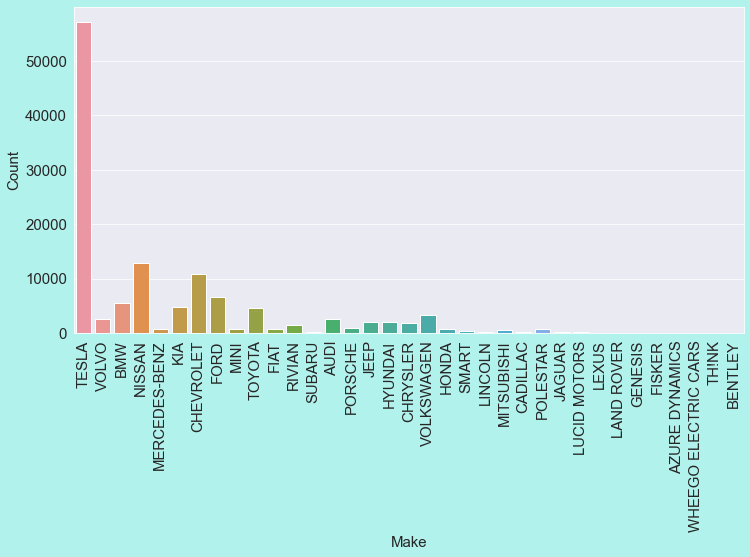

In [206]:
plt.figure(figsize=(12,6))
sns.countplot(data=e_v_P,x='Make')
plt.xticks(rotation=90)
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()


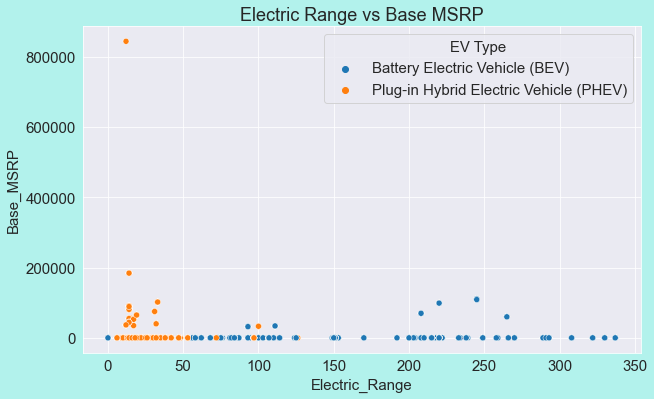

In [207]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=e_v_P, x='Electric_Range', y='Base_MSRP', hue='Electric_Vehicle_Type')
plt.title('Electric Range vs Base MSRP')
plt.xlabel('Electric_Range')
plt.ylabel('Base_MSRP')
plt.legend(title='EV Type')
plt.show()

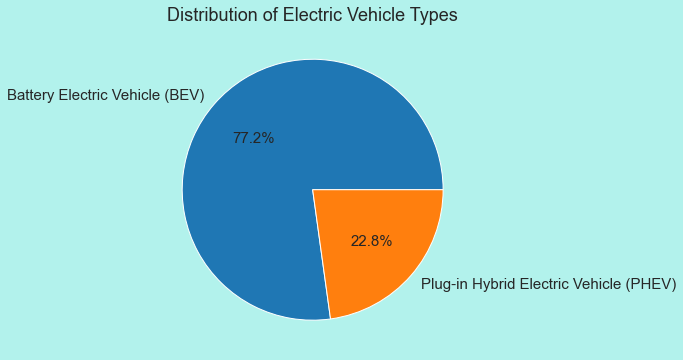

In [208]:
plt.figure(figsize=(8, 6))
e_v_P['Electric_Vehicle_Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Electric Vehicle Types')
plt.ylabel('')
plt.show()

Text(0.5, 1.0, 'Eliglibility')

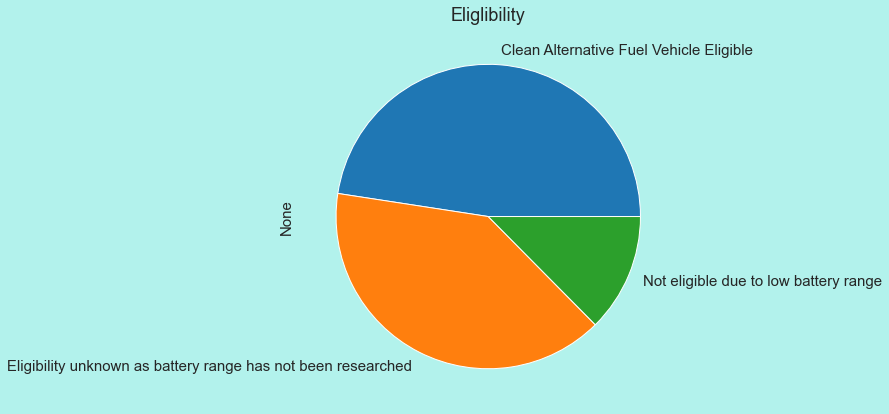

In [209]:
e_v_P.groupby('Clean_Alternative_Fuel_Vehicle (CAFV) Eligibility').size().plot(kind='pie')
plt.title('Eliglibility')

Text(0.5, 1.0, 'TESLA cars Count')

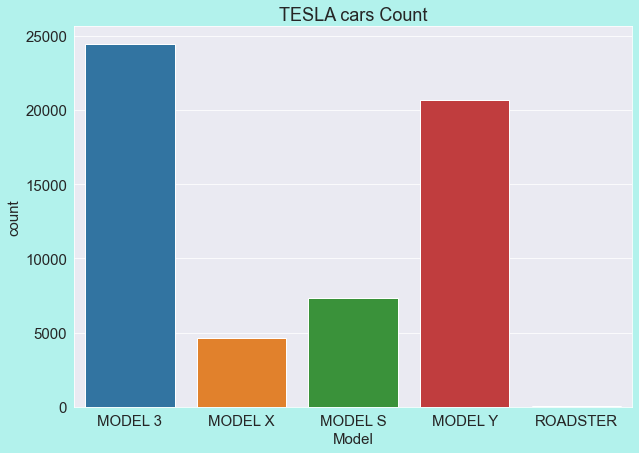

In [212]:
sns.countplot(data=e_v_P.loc[(e_v_P.Make=='TESLA')],x='Model')
plt.title('TESLA cars Count')

Text(0.5, 1.0, 'Hyundai cars Count')

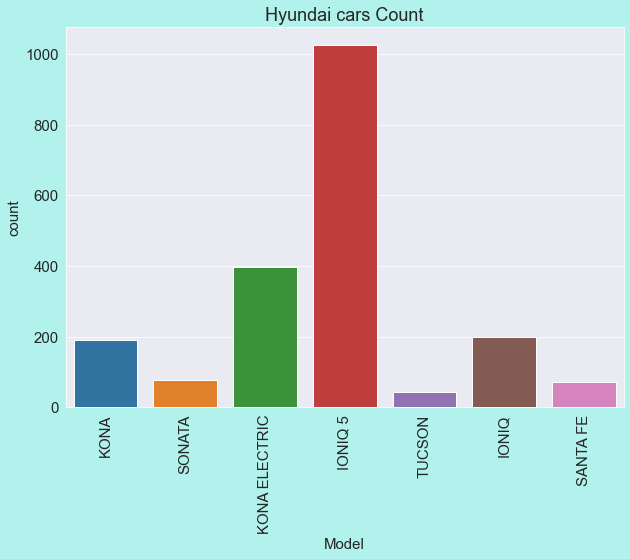

In [211]:
data_Hyundai=e_v_P.loc[(e_v_P.Make=='HYUNDAI')]
sns.countplot(data=data_Hyundai,x=data_Hyundai.Model)
plt.xticks(rotation=90)
plt.title('Hyundai cars Count')

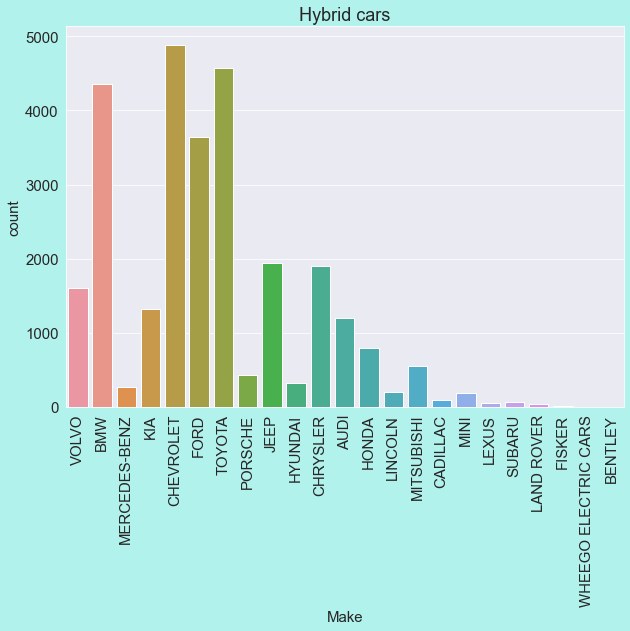

In [213]:
sns.countplot(data=e_v_P.loc[(e_v_P['Electric_Vehicle_Type']=='Plug-in Hybrid Electric Vehicle (PHEV)')],x='Make')
plt.title('Hybrid cars')
plt.xticks(rotation=90)
plt.show()

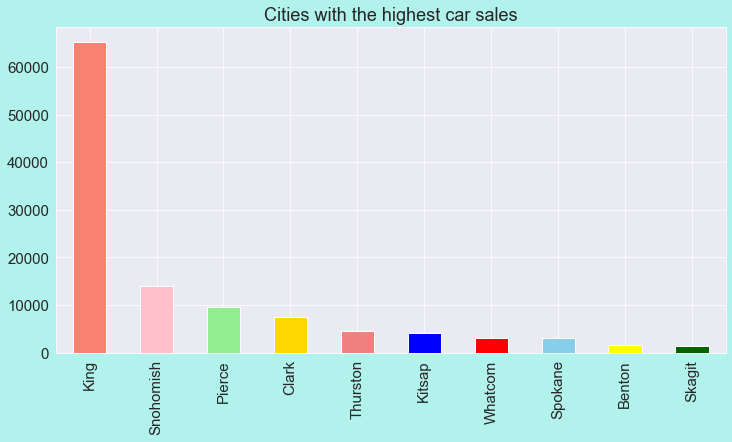

In [216]:
top_makes = e_v_P["County"].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_makes.plot(kind='bar', color = ['salmon','pink' , 'lightgreen', 'gold', 'lightcoral', 'blue', 'red', 'skyblue', 'yellow', 'darkgreen'])
plt.title('Cities with the highest car sales')

plt.show()

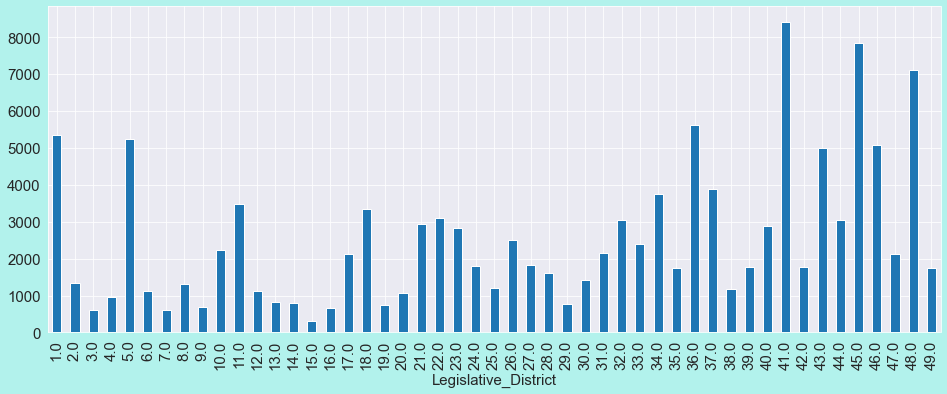

In [7]:
plt.figure(figsize=(16, 6))
e_v_P.groupby('Legislative_District').size().plot(kind='bar')
plt.show()

# TASK 4 : OUTLIERS

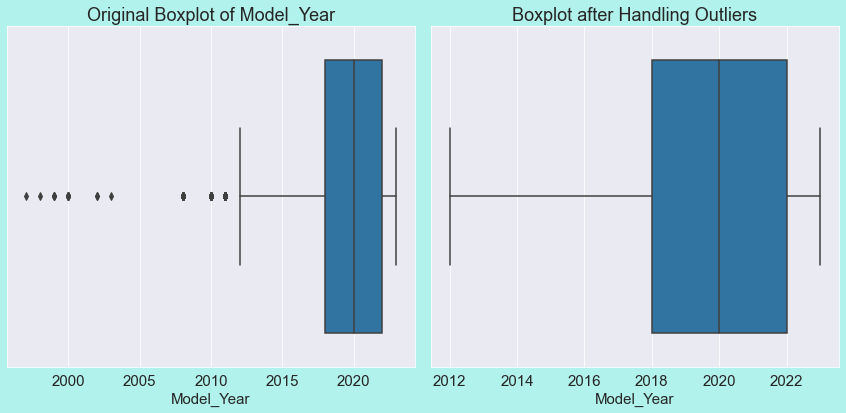

In [73]:
# Choose the feature for analysis (in this case, "age")
feature = "Model_Year"

# Create a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the original boxplot
sns.boxplot(x=e_v_P[feature], ax=axes[0])
axes[0].set_title(f"Original Boxplot of {feature}")

# Identify and handle outliers
Q1 = e_v_P[feature].quantile(0.25)
Q3 = e_v_P[feature].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_data = e_v_P[(e_v_P[feature] >= lower_bound) & (e_v_P[feature] <= upper_bound)]

# Plot the boxplot after handling outliers
sns.boxplot(x=filtered_data[feature], ax=axes[1])
axes[1].set_title(f"Boxplot after Handling Outliers")

# Display the plots
plt.tight_layout()
plt.show()

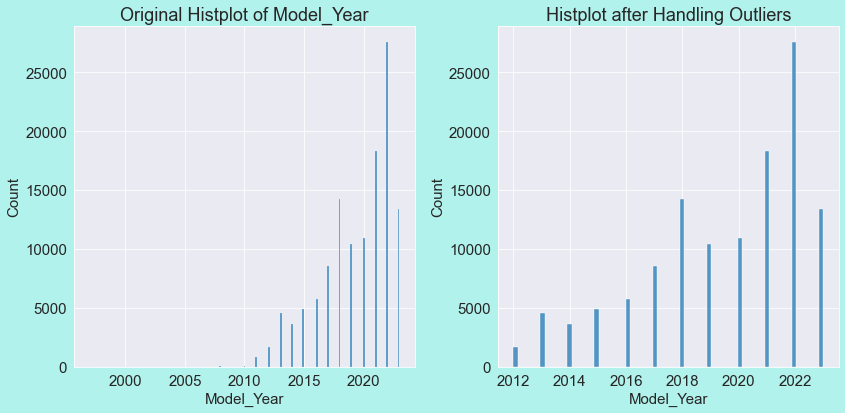

In [75]:
# Choose the feature for analysis (in this case, "age")
feature = "Model_Year"

# Create a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the original Histplot
sns.histplot(x=e_v_P[feature], ax=axes[0])
axes[0].set_title(f"Original Histplot of {feature}")

# Identify and handle outliers
Q1 = e_v_P[feature].quantile(0.25)
Q3 = e_v_P[feature].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_data = e_v_P[(e_v_P[feature] >= lower_bound) & (e_v_P[feature] <= upper_bound)]

# Plot the Histplot after handling outliers
sns.histplot(x=filtered_data[feature], ax=axes[1])
axes[1].set_title(f"Histplot after Handling Outliers")

# Display the plots
plt.tight_layout()
plt.show()

# TASK 5: Univariate Analysis

### HISTPLOT

Minimum ER: 0
Maximum ER: 337


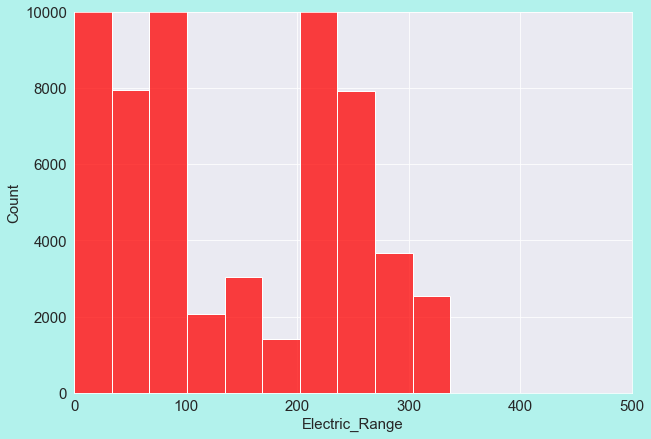

In [172]:
# 1. HISTOGRAM - sns.histplot()
fig, ax = plt.subplots()
sns.histplot(x='Electric_Range', data=e_v_P, bins=10, color = 'red', edgecolor='white')
print("Minimum ER:",e_v_P['Electric_Range'].min())
print("Maximum ER:",e_v_P['Electric_Range'].max())
ax.set_xlim(0, 500)
ax.set_ylim(0, 10000)

plt.show()

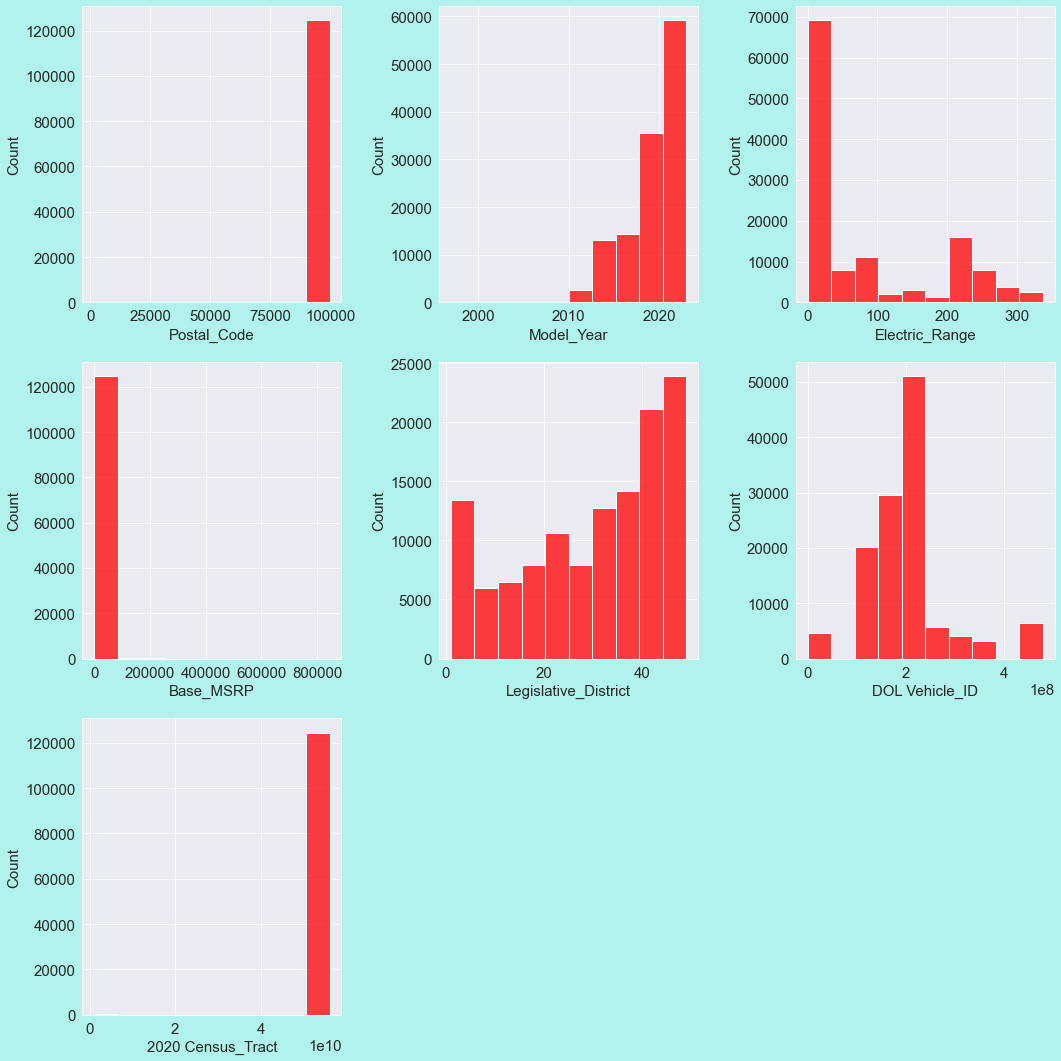

In [14]:
cols = 3
rows = 3
num_cols = e_v_P.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
#for i in num_cols:
    ax=fig.add_subplot(rows,cols,i+1)

    sns.histplot(x = e_v_P[col], ax = ax,bins=10, color = 'red', edgecolor='white')

fig.tight_layout()
plt.show()

### KDE PLOT

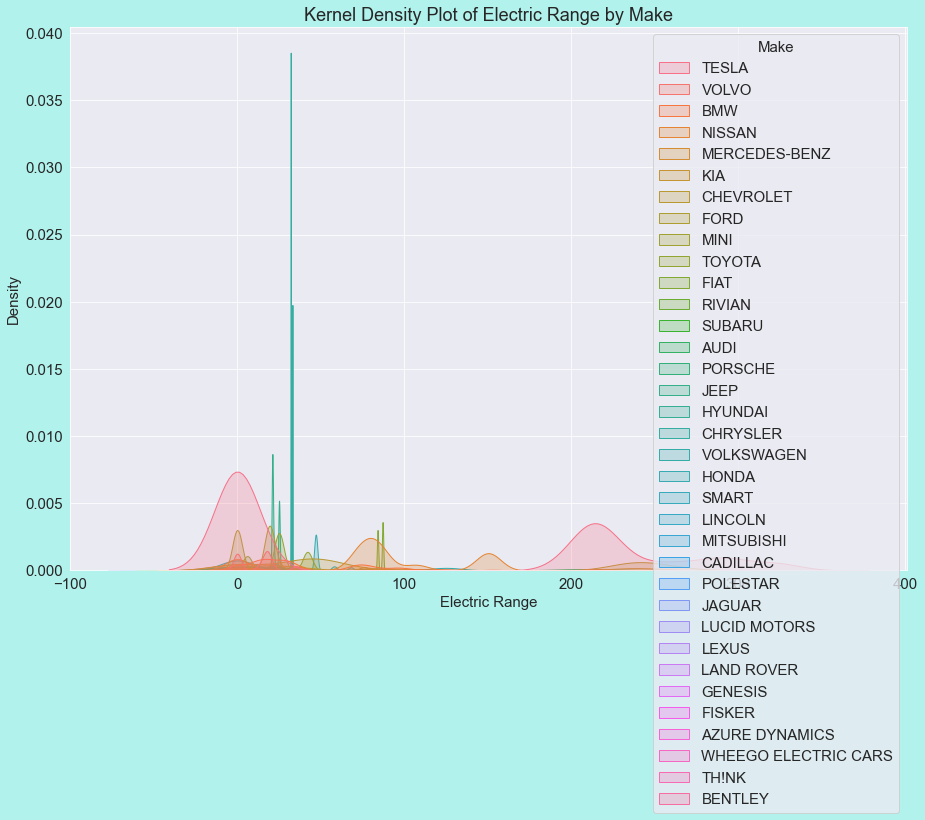

In [77]:
# 2. KDE PLOT - Kernal Density Plot - sns.kdeplot()
fig,ax = plt.subplots(figsize=(15, 10))
sns.kdeplot(x='Electric_Range', data=e_v_P, hue='Make',fill = True)
plt.xlabel('Electric Range')
plt.title('Kernel Density Plot of Electric Range by Make')
plt.show()

<AxesSubplot:xlabel='Model_Year', ylabel='Density'>

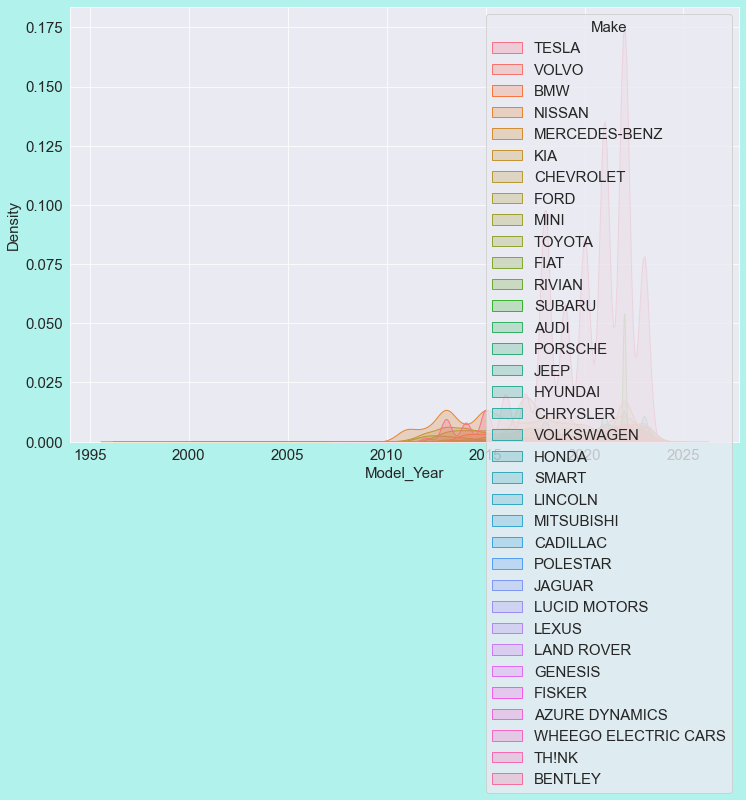

In [79]:
#KDE-Plot
plt.figure(figsize=(12,8))
sns.kdeplot(data=e_v_P,x='Model_Year',hue='Make',fill=True)

<AxesSubplot:xlabel='Electric_Range', ylabel='Count'>

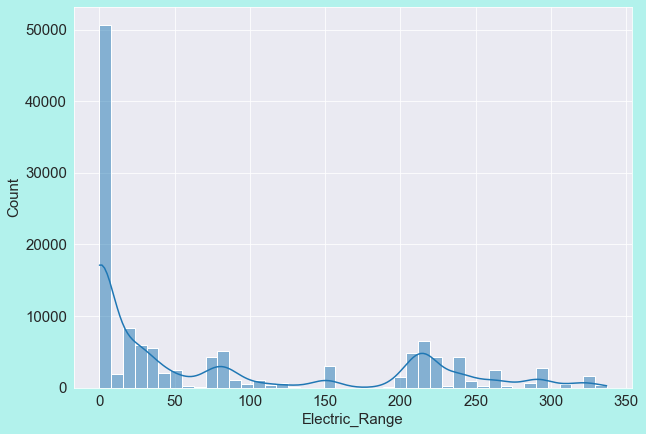

In [78]:
# with histogram - sns.histplot(kde=TRUE)
sns.histplot(x='Electric_Range', data=e_v_P, kde=True)

### RUG PLOT

<AxesSubplot:xlabel='Model_Year', ylabel='Count'>

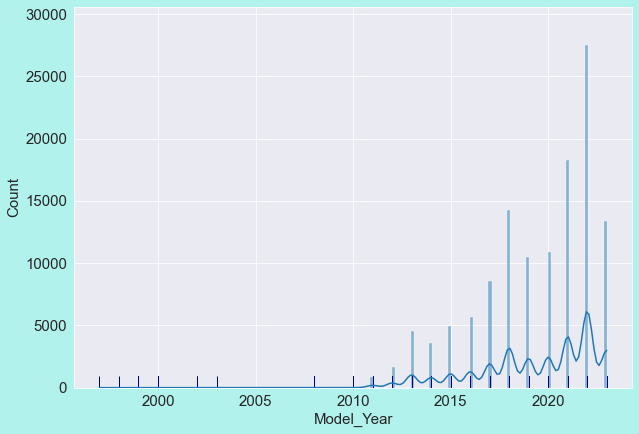

In [80]:
# RUG PLOT - sns.rugplot()
sns.rugplot(x='Model_Year', data=e_v_P, height=.03, color='darkblue')
sns.histplot(x='Model_Year', data=e_v_P, kde=True)

### BOX PLOT

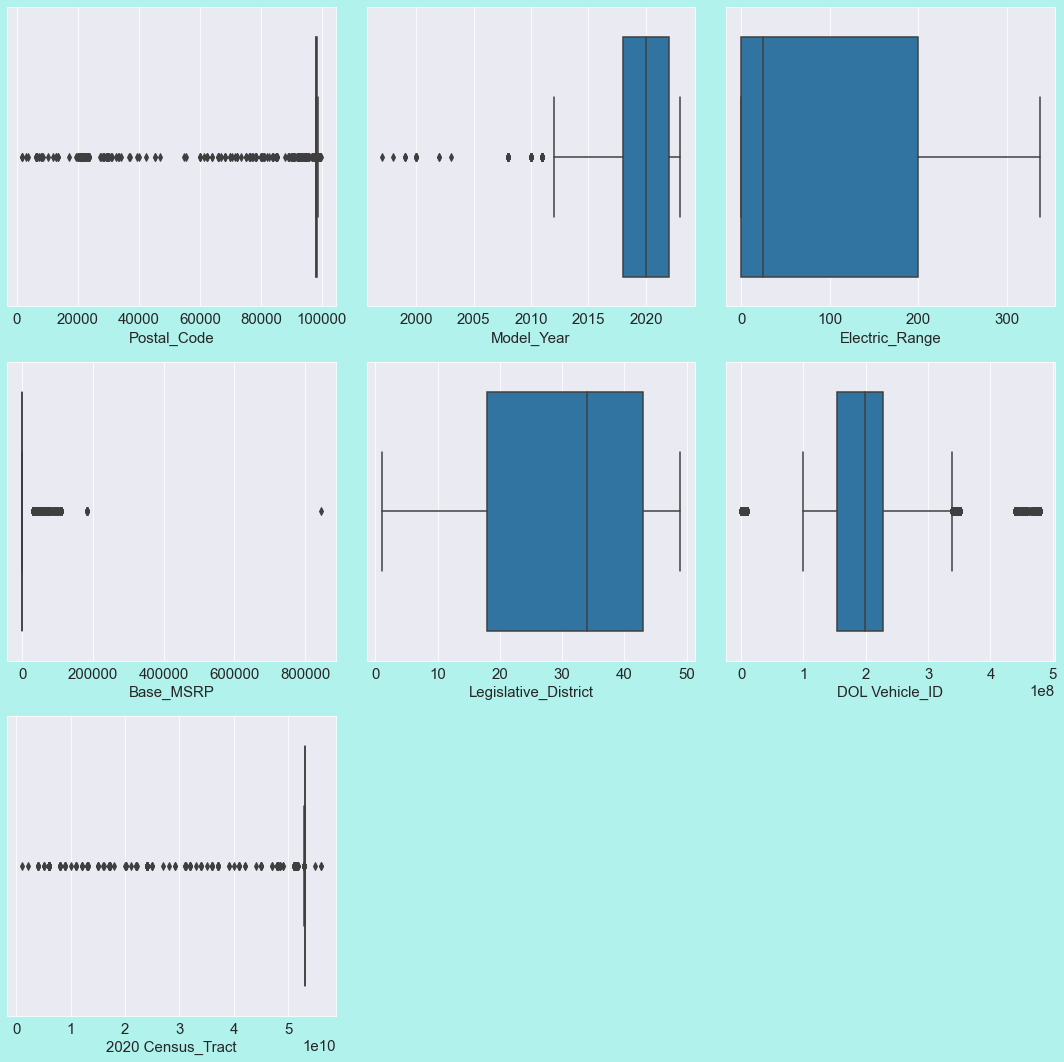

In [81]:
# BOX PLOTS - sns.boxplot()
cols = 3
rows = 3
num_cols = e_v_P.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
#for i in num_cols:
    ax=fig.add_subplot(rows,cols,i+1)

    sns.boxplot(x = e_v_P[col], ax = ax)

fig.tight_layout()
plt.show()

### VIOLIN PLOT

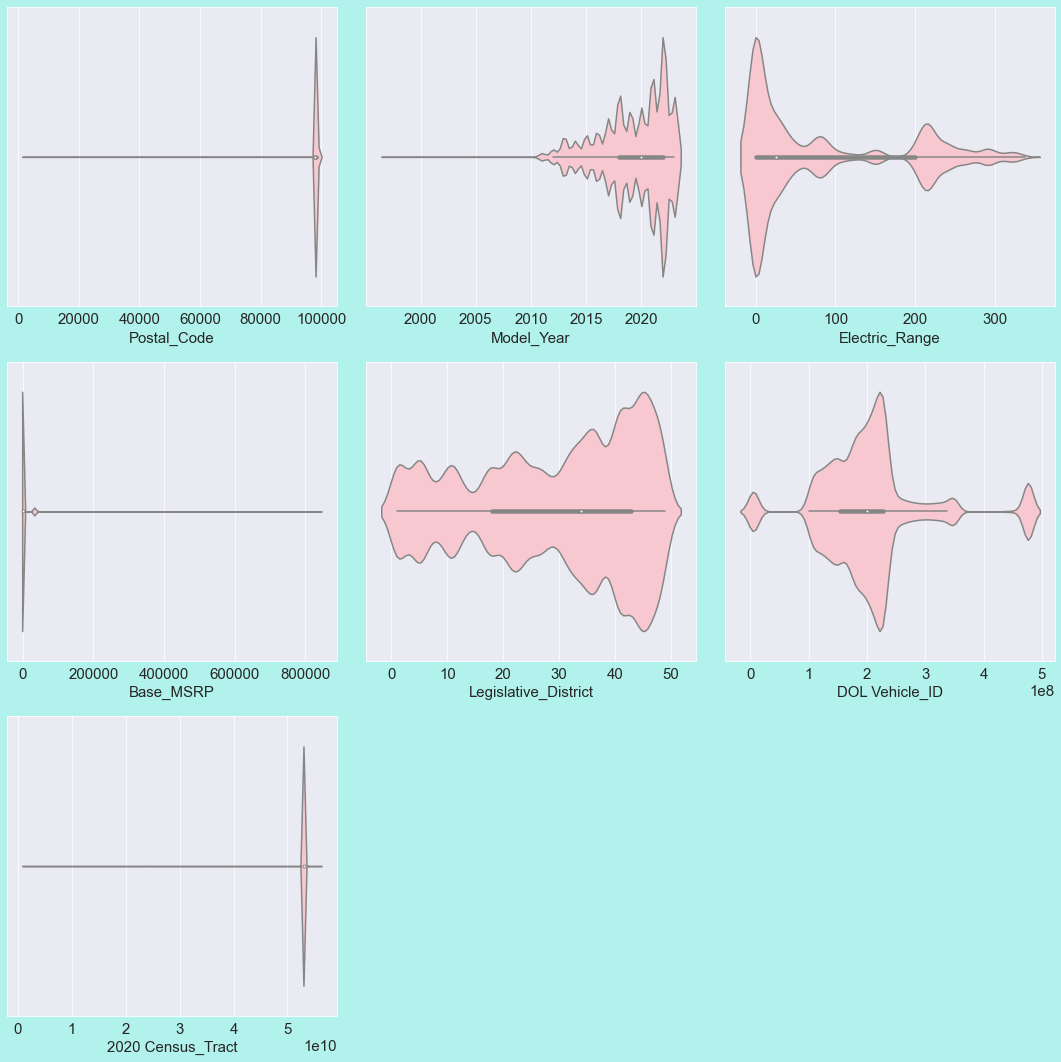

In [84]:
#Violin Plot - sns.violinplot()
cols = 3
rows = 3
num_cols = e_v_P.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
#for i in num_cols:
    ax=fig.add_subplot(rows,cols,i+1)

    sns.violinplot(x = e_v_P[col], ax = ax,color='pink')

fig.tight_layout()
plt.show()

### STRIP PLOT

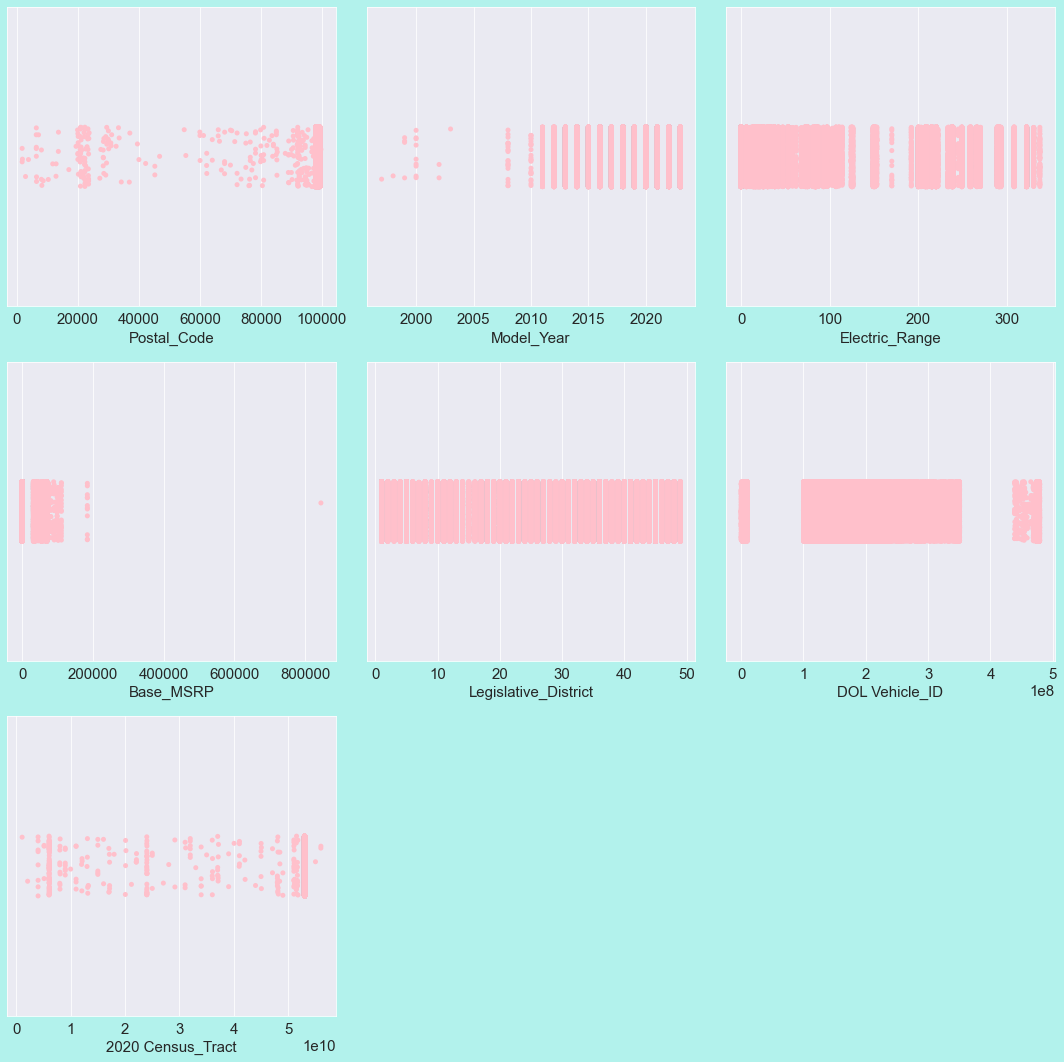

In [85]:
#Strip plot()
cols = 3
rows = 3
num_cols = e_v_P.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
#for i in num_cols:
    ax=fig.add_subplot(rows,cols,i+1)

    sns.stripplot(x = e_v_P[col], ax = ax , color='pink')

fig.tight_layout()
plt.show()

## CATEGORIAL FEATURES

In [86]:
# CATEGORICAL FEATURES
e_v_P.describe(include='object')

,VIN (1-10),County,City,State,Make,Model,Electric_Vehicle_Type,Clean_Alternative_Fuel_Vehicle (CAFV) Eligibility,Vehicle_Location,Electric_Utility
count,124716,124714,124714,124716,124716,124535,124716,124716,124687,124243
unique,8340,166,651,44,35,120,2,3,768,73
top,5YJYGDEE9M,King,Seattle,WA,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
freq,463,65268,22009,124419,57124,24409,96266,59334,3247,44995


### Pie chart for categorical variable City

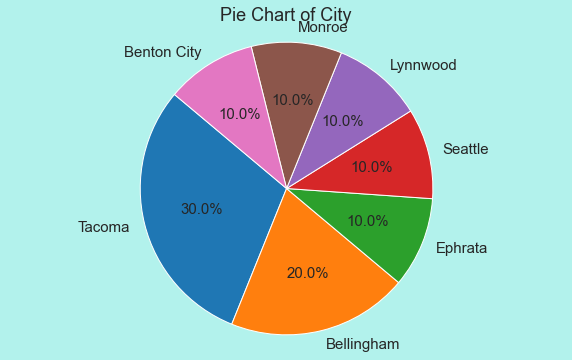

In [184]:
bottom_10 = e_v_P.tail(10)
xlabels = bottom_10.City
country_counts = bottom_10['City'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(country_counts.values, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Pie Chart of City')
plt.show()

### Bar Chart(for categorical variable "City")

Text(599.1068181818181, 0.5, 'Frequency')

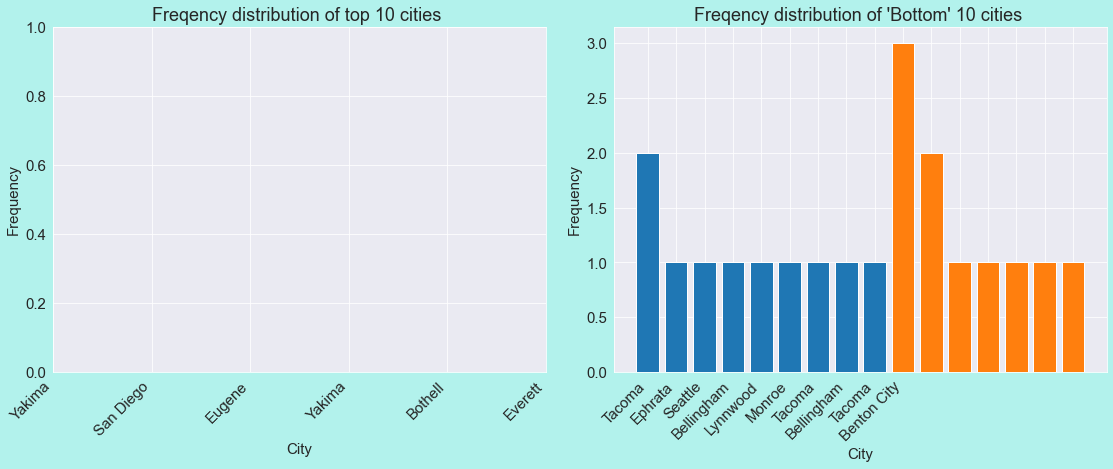

In [186]:
top_10 = e_v_P.head(10)
# Assuming 'City' is the categorical variable - We will plot for top 10 and bottom 10 City 
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plt.tight_layout(pad=2)

xlabels = top_10.City
city_counts = top_10['City'].value_counts()
axes[0].set_title('Freqency distribution of top 10 cities ')
axes[0].set_xticklabels(xlabels, rotation=45, ha='right')
plt.bar(city_counts.index, city_counts.values)
axes[0].set_xlabel('City')
axes[0].set_ylabel('Frequency')


xlabels = bottom_10.City
city_counts = bottom_10['City'].value_counts()
axes[1].set_title('Freqency distribution of \'Bottom\' 10 cities ')
axes[1].set_xticklabels(xlabels, rotation=45, ha='right')
plt.bar(city_counts.index, city_counts.values)
axes[1].set_xlabel('City')
axes[1].set_ylabel('Frequency')

### COUNT PLOT

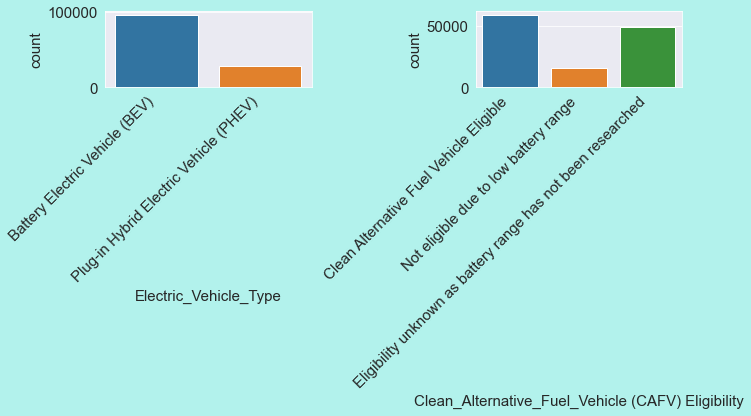

In [8]:
# 1. COUNT PLOT
cols = 4
rows = 1
fig = plt.figure(figsize= (20,6))
all_categs = e_v_P.select_dtypes(include='object')
cat_cols = all_categs.columns[all_categs.nunique() < 10]
for i, col in enumerate(cat_cols):

    ax=fig.add_subplot(rows, cols, i+1)

    sns.countplot(x=e_v_P[col], ax=ax)

    plt.xticks(rotation=45, ha='right')

fig.tight_layout()
plt.show()

### PIE CHART

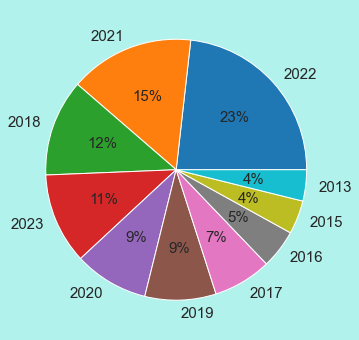

In [18]:
# 2. PIE CHART
fig = plt.figure(figsize= (50,6))
df = e_v_P['Model_Year'].value_counts()[:10]
plt.pie(df, labels=df.index, autopct="%.0f%%");

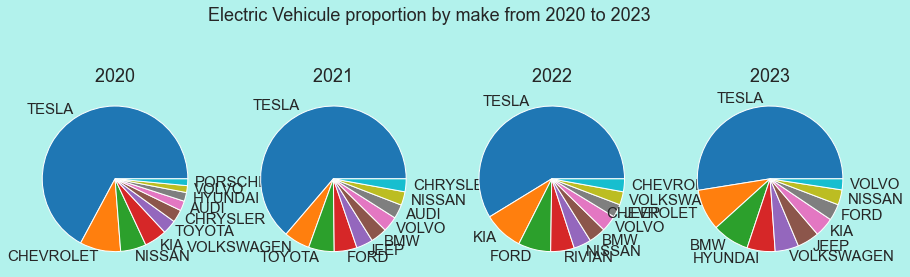

In [89]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for i, year in enumerate([2020, 2021, 2022, 2023]):
    make_yearly = e_v_P[e_v_P['Model_Year'] == year]['Make'].value_counts()[:10]
    axs[i].pie(make_yearly.values, labels=make_yearly.index)
    axs[i].set_title(f" {year} ")
fig.suptitle('Electric Vehicule proportion by make from 2020 to 2023')
plt.show()

# TASK 6: BIVARIATE ANALYSIS

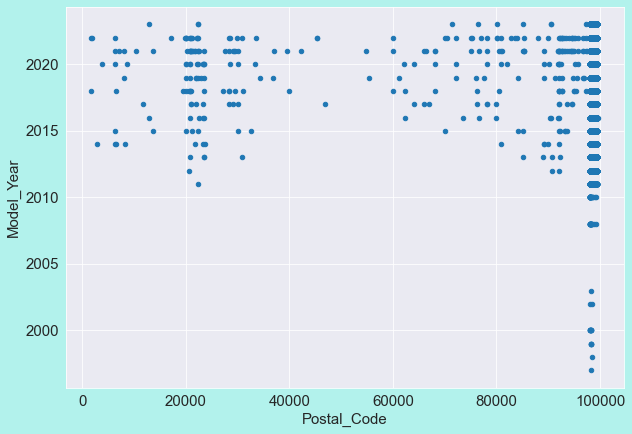

In [90]:
e_v_P.plot.scatter(x="Postal_Code",y="Model_Year")
plt.show()

### Line Chart

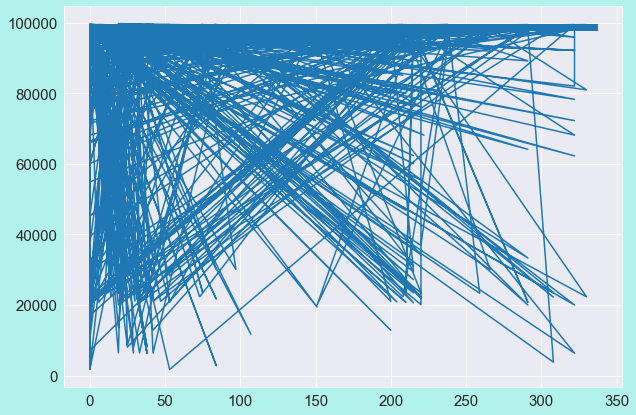

In [91]:
#LINE CHART
x = e_v_P.Electric_Range
y = e_v_P.Postal_Code
plt.plot(x, y)
plt.show()

### Heat Map

<AxesSubplot:>

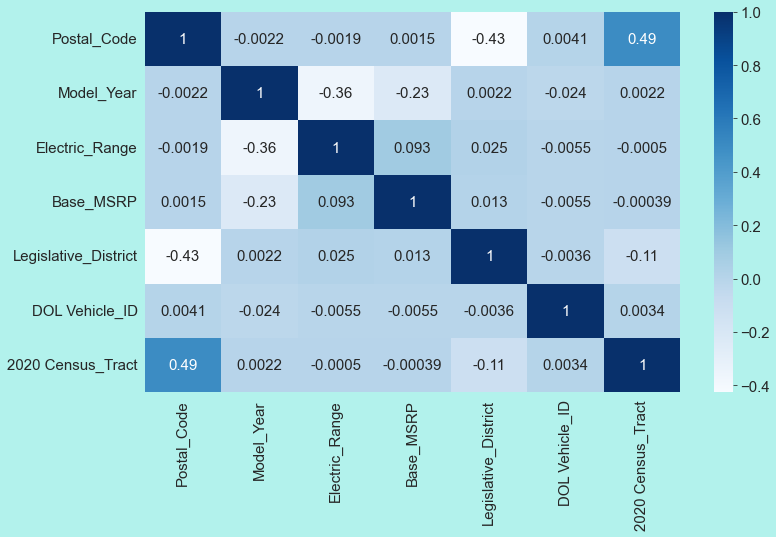

In [92]:
#HEAT MAP
plt.figure(figsize=(12,7))
sns.heatmap(e_v_P.corr(),annot = True,cmap="Blues")

### Hexbin Plot

<Figure size 1440x720 with 0 Axes>

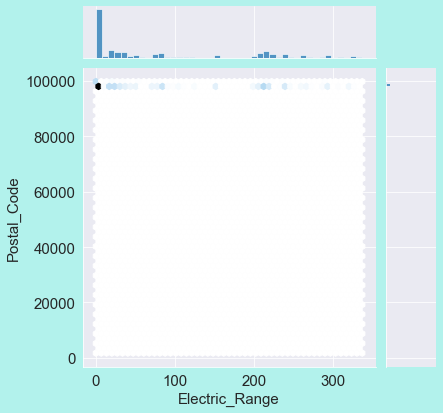

In [12]:
fig = plt.figure(figsize= (20,10))
sns.jointplot(x='Electric_Range', y='Postal_Code', kind='hex', data=e_v_P,gridsize=50)
plt.show()


### Box Plot

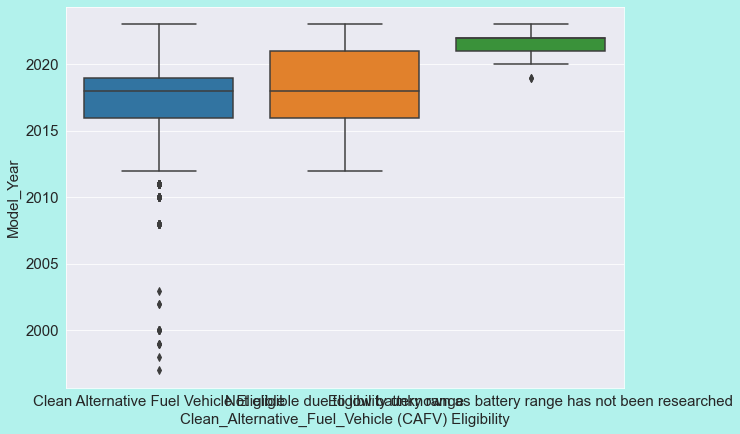

In [94]:
sns.boxplot(data=e_v_P, x="Clean_Alternative_Fuel_Vehicle (CAFV) Eligibility", y="Model_Year")
plt.show()

### Violin Plot

<AxesSubplot:xlabel='Model_Year', ylabel='Legislative_District'>

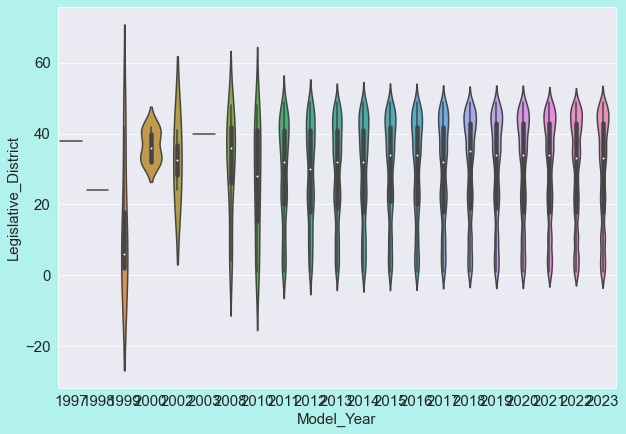

In [95]:
sns.violinplot(x=e_v_P["Model_Year"], y=e_v_P["Legislative_District"])

### Regression Analysis

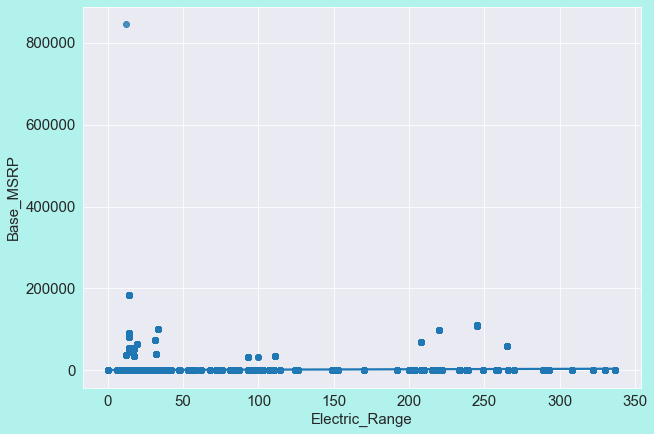

In [13]:
sns.regplot(x='Electric_Range', y='Base_MSRP', data=e_v_P)
plt.show()

# TASK 7: MULTIVARIATE ANALYSIS

### Pair Plot

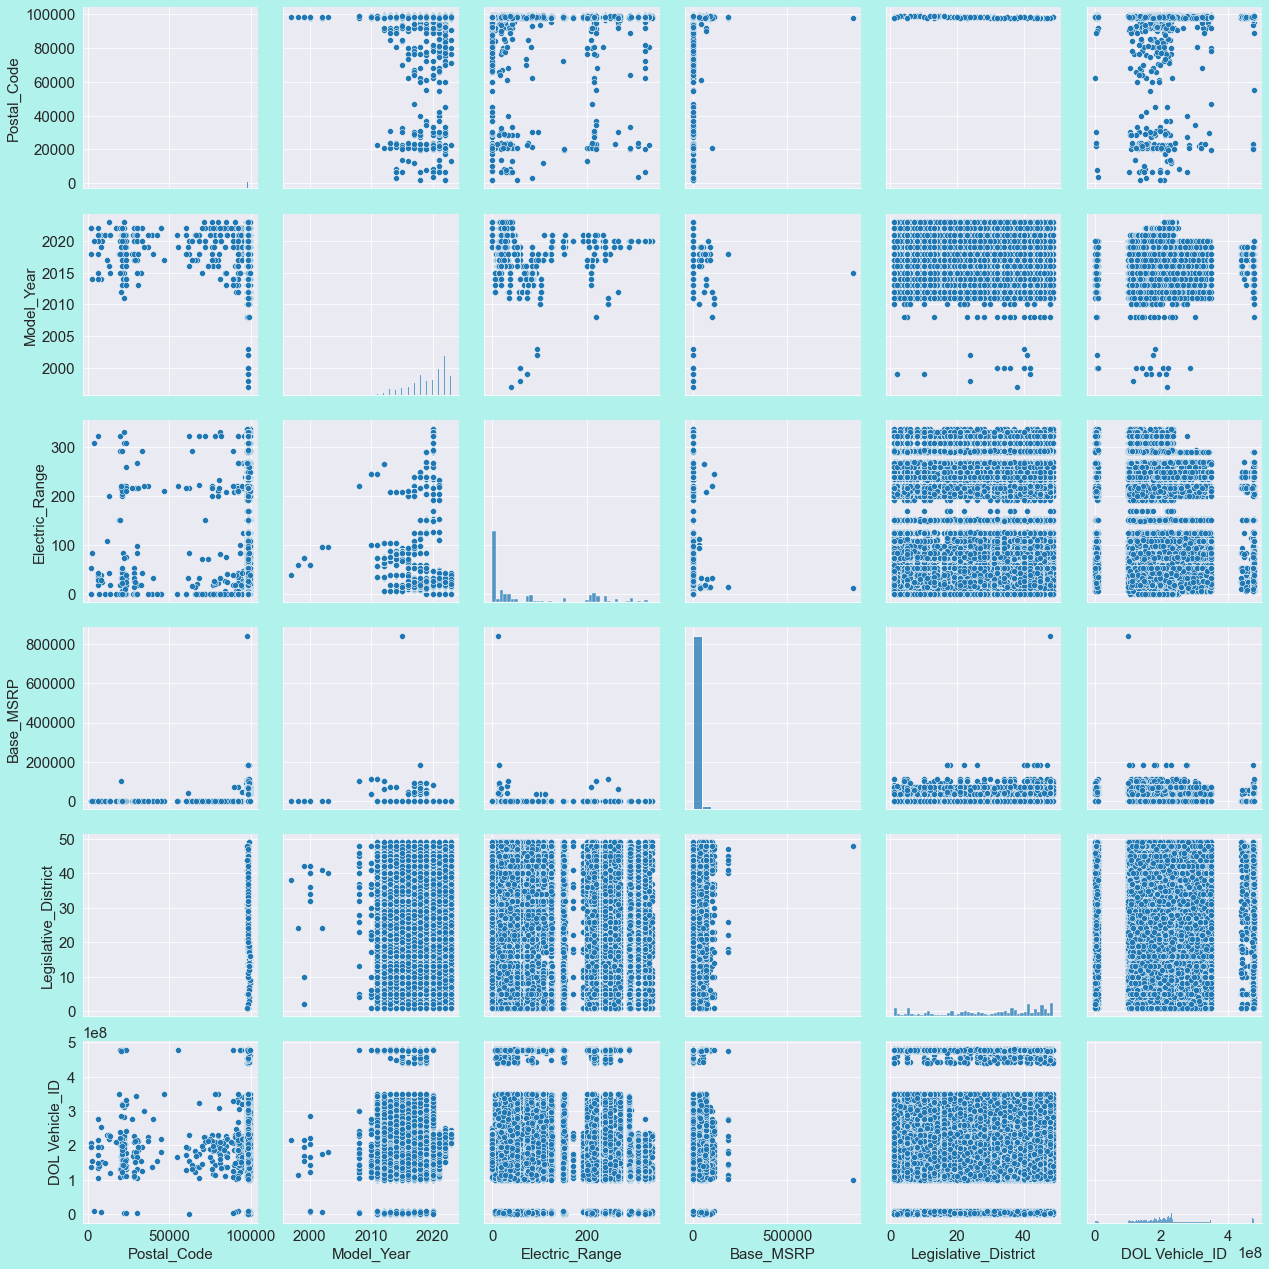

In [96]:
sns.pairplot(data=e_v_P, vars=["Postal_Code","Model_Year","Electric_Range","Base_MSRP","Legislative_District","DOL Vehicle_ID"],size=3,markers=['o','s','H'])
plt.show()

# TASK 8 : DISTRIBUTIONS

In [114]:
# block 1 - simple stats
mean1 = e_v_P['Electric_Range'].mean()
sum1 = e_v_P['Electric_Range'].sum()
max1 = e_v_P['Electric_Range'].max()
min1 = e_v_P['Electric_Range'].min()
count1 = e_v_P['Electric_Range'].count()
median1 = e_v_P['Electric_Range'].median() 
std1 = e_v_P['Electric_Range'].std() 
var1 = e_v_P['Electric_Range'].var()  
avg = e_v_P['Electric_Range'].mean()
# block 2 - group by
groupby_sum1 = e_v_P.groupby(['Model']).sum() 
groupby_count1 = e_v_P.groupby(['Model']).count()

# print block 1
print('mean Electric range: ' + str(mean1))
print('sum of Electric range: ' + str(sum1))
print('max Electric range: ' + str(max1))
print('min Electric range: ' + str(min1))
print('count of Electric range: ' + str(count1))
print('median Electric range: ' + str(median1))
print('std of Electric range: ' + str(std1))
print('var of Electric range: ' + str(var1))
print('average of ELectric range: ' +str(avg))

# print block 2
print('sum of values, grouped by the Model: ' + str(groupby_sum1))
print('count of values, grouped by the model: ' + str(groupby_count1))

mean Electric range: 79.47193623913532
sum of Electric range: 9911422
max Electric range: 337
min Electric range: 0
count of Electric range: 124716
median Electric range: 25.0
std of Electric range: 100.33196883976575
var of Electric range: 10066.503971263724
average of ELectric range: 79.47193623913532
sum of values, grouped by the Model:        Postal_Code  Model_Year  Electric_Range  Base_MSRP  \
Model                                                       
330E    38330183.0      791796            6898    8176900   
500     79563470.0     1632505           69363          0   
530E    35974165.0      739015            5718   15337350   
740E     2656195.0       54484             378    2441500   
745E      885732.0       18180             144          0   
...            ...         ...             ...        ...   
X3      28479055.0      586011            4930          0   
X5     181955787.0     3748367           47072          0   
XC40    48803405.0     1004692               0  

### SUBTASK 8.1: POWER LAW DISTRIBUTION

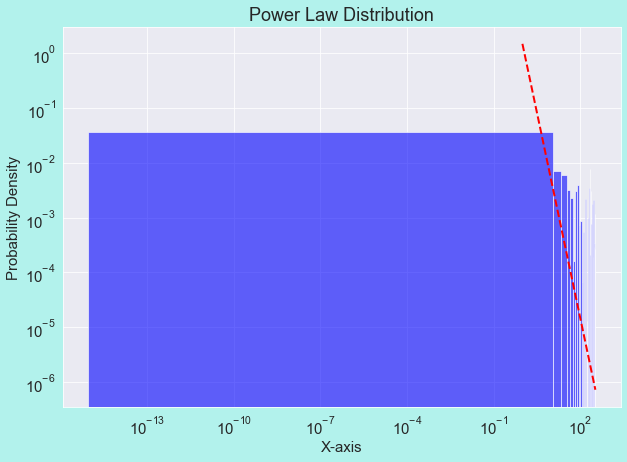

In [101]:
# Define parameters of the power law distribution
alpha = 2.5  # The exponent of the power law

# Generate random samples from a power law distribution
samples = e_v_P.Electric_Range 

# Plot a histogram of the samples
plt.hist(samples, bins=30, density=True, alpha=0.6, color='b')

# Plot the probability density function
x = np.linspace(1, max(samples), 100)
pdf = (alpha - 1) / x**alpha
plt.plot(x, pdf, 'r--', lw=2)

plt.title("Power Law Distribution")
plt.xlabel("X-axis")
plt.ylabel("Probability Density")
plt.yscale('log')  # Use a log-scale for the y-axis
plt.xscale('log')  # Use a log-scale for the x-axis
plt.show()


###  SUBTASK 8.2 : BINOMIAL DISTRIBUTION

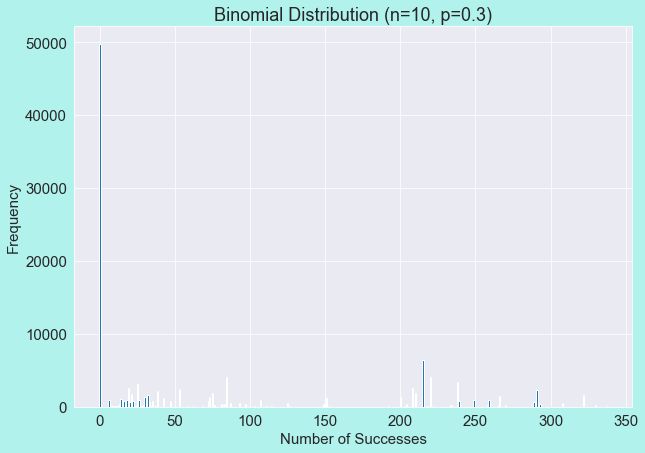

In [102]:
# Define the parameters of the binomial distribution
n = 10  # Number of trials
p = 0.3  # Probability of success

# Generate random samples from a binomial distribution
samples = e_v_P.Electric_Range

# Create a bar plot to visualize the distribution
unique, counts = np.unique(samples, return_counts=True)
plt.bar(unique, counts)

# Add labels and title to the plot
plt.xlabel("Number of Successes")
plt.ylabel("Frequency")
plt.title(f"Binomial Distribution (n={n}, p={p})")

# Show the plot
plt.show()


### SUBTASK 8.3 : UNIFORM DISTRIBUTION

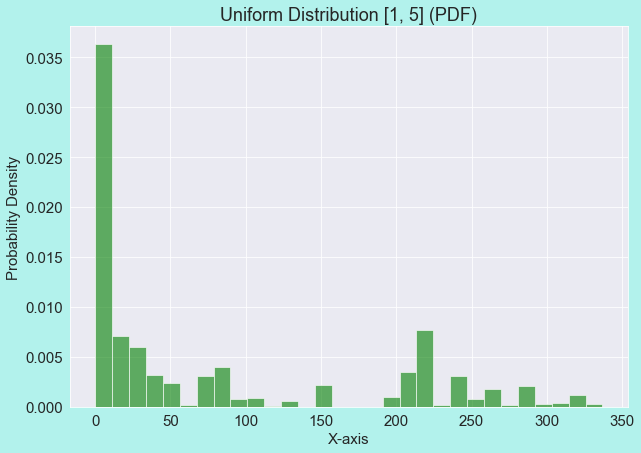

In [104]:
# Define the interval [a, b]
a = 1
b = 5

# Generate random samples from a uniform distribution
samples = e_v_P.Electric_Range

# Create a histogram to visualize the PDF
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g')

# Add labels and title to the plot
plt.xlabel("X-axis")
plt.ylabel("Probability Density")
plt.title(f"Uniform Distribution [{a}, {b}] (PDF)")

# Show the plot
plt.show()

### SUBTASK 8.4: CHI-SQUARE DISTRIBUTION

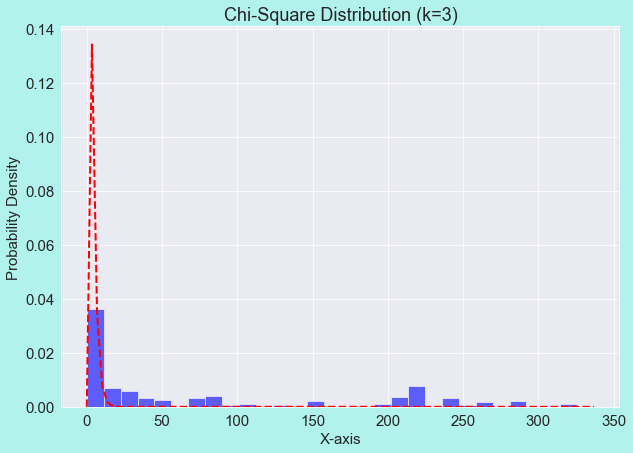

In [106]:

# Define the degrees of freedom (k)
k = 3  # Example: Degrees of freedom

# Generate random samples from a chi-square distribution
samples = e_v_P.Electric_Range

# Create a histogram to visualize the distribution
plt.hist(samples, bins=30, density=True, alpha=0.6, color='b')

# Create the theoretical probability density function
x = np.linspace(0, max(samples), 100)
pdf = (1/(2**(k/2) * np.math.gamma(k/2))) * x**((k/2) - 1) * np.exp(-x/2)
plt.plot(x, pdf, 'r--', lw=2)

# Add labels and title to the plot
plt.xlabel("X-axis")
plt.ylabel("Probability Density")
plt.title(f"Chi-Square Distribution (k={k})")

# Show the plot
plt.show()

### SUBTASK 8.5: F-DISTRIBUTION

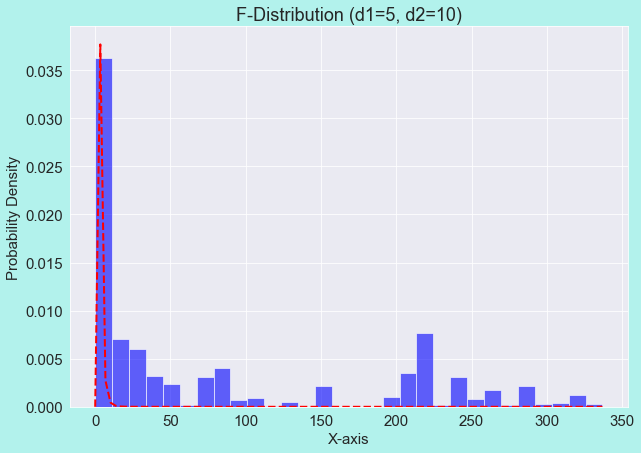

In [107]:

# Define the degrees of freedom parameters (d1 and d2)
d1 = 5  # Example: Degrees of freedom parameter 1
d2 = 10  # Example: Degrees of freedom parameter 2

# Generate random samples from an F-distribution
samples = e_v_P.Electric_Range

# Create a histogram to visualize the distribution
plt.hist(samples, bins=30, density=True, alpha=0.6, color='b')

# Create the theoretical probability density function
x = np.linspace(0, max(samples), 100)
pdf = (np.math.gamma((d1 + d2) / 2) / (np.math.gamma(d1 / 2) * np.math.gamma(d2 / 2))) * (d1 / d2)**(d1 / 2) * x**(d1 / 2 - 1) * (1 + (d1 * x) / d2)**(-(d1 + d2) / 2)
plt.plot(x, pdf, 'r--', lw=2)

# Add labels and title to the plot
plt.xlabel("X-axis")
plt.ylabel("Probability Density")
plt.title(f"F-Distribution (d1={d1}, d2={d2})")

# Show the plot
plt.show()


# TASK 9 : Hypothesis Testing

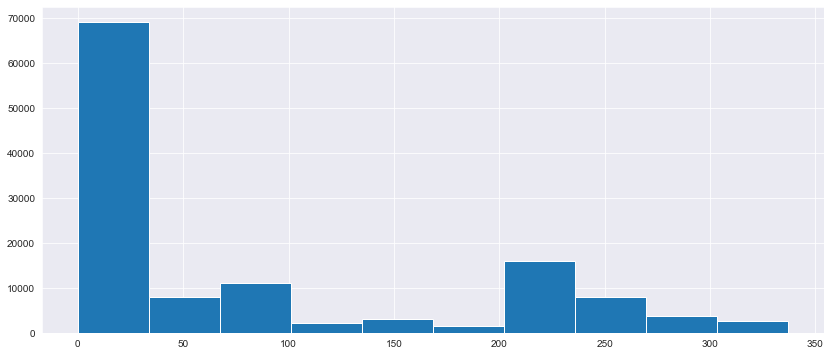

In [109]:
#Cheking Histogram
import matplotlib
%matplotlib inline
plt.figure(figsize=(14,6))
plt.hist(e_v_P['Electric_Range'])
plt.show()

### SUBTASK 9.1 : Normality Testing using Shapiro-Wilk Test
Tests whether a data sample has a Gaussian distribution

Assumptions

Observations in each sample are independent and identically distributed (iid).
Interpretation

**H0: the sample has a Normal distribution.
H1: the sample does not have a Normal distribution.**

In [166]:
#Help from Python
from scipy.stats import shapiro

DataToTest = e_v_P['Electric_Range']

stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal Distribution')
else:
    print('Not a normal distribution')

stat=0.77, p=0.000000000000000000000000000000
Not a normal distribution


### SUBTASK 9.2 :Correlation Test - Pearson and Spearman’s Rank Correlation
Asumption - Identical and Normal Distribution

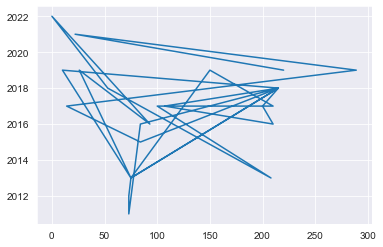

In [112]:
FirstSample = e_v_P[1:30]['Electric_Range']
SecondSample = e_v_P[1:30]['Model_Year']

plt.plot(FirstSample,SecondSample)
plt.show()

In [9]:
#Spearman Rank Correlation
from scipy.stats import spearmanr
stat, p = spearmanr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('independent samples')
else:
    print('dependent samples')

stat=0.100, p=0.604300
independent samples


In [10]:
#pearson correlation
from scipy.stats import pearsonr
stat, p = pearsonr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('independent samples')
else:
    print('dependent samples')

stat=0.073, p=0.707962
independent samples


In [11]:
e_v_P[1:30].corr(method="pearson")

,Postal_Code,Model_Year,Electric_Range,Base_MSRP,Legislative_District,DOL Vehicle_ID,2020 Census_Tract
Postal_Code,1.000000,0.037381,-0.189559,-0.530755,-0.295481,0.060331,0.981181
Model_Year,0.037381,1.000000,0.072665,-0.277585,0.023242,0.330841,0.018053
Electric_Range,-0.189559,0.072665,1.000000,0.141840,0.148585,0.341245,-0.168800
Base_MSRP,-0.530755,-0.277585,0.141840,1.000000,-0.046243,0.089087,-0.477524
Legislative_District,-0.295481,0.023242,0.148585,-0.046243,1.000000,0.149112,-0.088860
DOL Vehicle_ID,0.060331,0.330841,0.341245,0.089087,0.149112,1.000000,0.058400
2020 Census_Tract,0.981181,0.018053,-0.168800,-0.477524,-0.088860,0.058400,1.000000


### SUBTASK 9.3 : Correlation of categorical variable - Chi square test

In [55]:
contingency_data = pd.crosstab(e_v_P['Clean_Alternative_Fuel_Vehicle (CAFV) Eligibility'], e_v_P['Make'],margins = False)
contingency_data

Make,AUDI,AZURE DYNAMICS,BENTLEY,BMW,CADILLAC,CHEVROLET,CHRYSLER,FIAT,FISKER,FORD,...,PORSCHE,RIVIAN,SMART,SUBARU,TESLA,TH!NK,TOYOTA,VOLKSWAGEN,VOLVO,WHEEGO ELECTRIC CARS
Clean_Alternative_Fuel_Vehicle (CAFV) Eligibility,,,,,,,,,,,,,,,,,,,,,
Clean Alternative Fuel Vehicle Eligible,612,7,0,3188,100,8660,1906,810,15,548,...,200,0,274,0,25629,3,1272,1040,255,3
Eligibility unknown as battery range has not been researched,675,0,0,685,12,2176,0,0,0,2774,...,272,1429,0,121,31495,0,29,2329,914,0
Not eligible due to low battery range,1198,0,3,1705,0,0,0,0,0,3358,...,426,0,0,63,0,0,3365,0,1349,0


In [57]:
stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('independent categories')
else:
    print('dependent categories')

stat=87518.077, p=0.000
dependent categories


### SUBTASK 9.4 : Parametic test 1- T-test

### SUBTASK 9.4.1 : One Sample T-test
**HO: Average Electric Range is 79.47
H1: Average Electric Range is not 79.47**

In [135]:

Electric_Range_mean = np.mean(e_v_P.Electric_Range)
print(Electric_Range_mean)
tset, pval = ttest_1samp(e_v_P.Electric_Range,79.47)
print('p-values',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

79.47193623913532
p-values 0.9945622833334069
we are accepting null hypothesis


### SUBTASK 9.4.2 : Independent Sample T-test
**H0: THere is association between Electric_Range and Model_Year
H1: There is not any association between electric_Range and Model_Year**

In [134]:

from scipy.stats import ttest_ind

Electric_Range_mean = np.mean(e_v_P.Electric_Range)
Model_Year_mean = np.mean(e_v_P.Model_Year)
print("Electric Range mean value:",Electric_Range_mean)
print("Model Year mean value:",Model_Year_mean)
Electric_Range_std = np.std(e_v_P.Electric_Range)
Model_Year_std = np.std(e_v_P.Model_Year)
print("Electric Range std value:",Electric_Range_std)
print("Model Year std value:",Model_Year_std)
ttest,pval = ttest_ind(e_v_P.Electric_Range,e_v_P.Model_Year)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

Electric Range mean value: 79.47193623913532
Model Year mean value: 2019.4063392026685
Electric Range std value: 100.33156659719077
Model Year std value: 2.976161943930705
p-value 0.0
we reject null hypothesis


### SUBTASK 9.4.3 : Paired Sample Test
**H0 :- means difference between two sample is 0
H1:- mean difference between two sample is not 0**

In [137]:
from scipy import stats
e_v_P[['Electric_Range','Base_MSRP']].describe()
ttest,pval = stats.ttest_rel(e_v_P['Electric_Range'], e_v_P['Base_MSRP'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


### SUBTASK 9.5 : Parametic test 2 - Anova - Tests whether the means of two or more independent samples are significantly different.

In [155]:
import scipy
tstat, p = scipy.stats.f_oneway(e_v_P.Electric_Range, e_v_P.Model_Year, e_v_P.Base_MSRP)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Same distribution')
else:
    print('Different distributions')

stat=18141.947, p=0.000
Different distributions


### SUBTASK 9.6 : Non Parametric test 1

### SUBTASK 9.6.1 :Mann-Whitney U Test-Tests whether the distributions of two or more independent samples are equal or not.

In [153]:
import scipy
tstat, p = scipy.stats.mannwhitneyu(e_v_P.Electric_Range, e_v_P.Base_MSRP)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Same distribution')
else:
    print('Different distributions')

stat=18141.947, p=0.000
Different distributions


### SUBTASK 9.6.4 : Friedman Test
Tests whether the distributions of two or more paired samples are equal or not.

Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample can be ranked.
Observations across each sample are paired.
Interpretation

**H0: the distributions of all samples are equal.
H1: the distributions of one or more samples are not equal.**

In [164]:

from scipy.stats import friedmanchisquare
stat, p = friedmanchisquare(e_v_P.Electric_Range, e_v_P.Base_MSRP, e_v_P.Model_Year)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=215342.182, p=0.000
Probably different distributions


### SUBTASK 9.7 : Test of Stationarity - very Important for time series analysis

### SUBTASK 9.7.1 :Augmented Dickey-Fuller Test

**null hypothesis - Series is non stationary**

Definition of stationary time series - constant mean and variance

In [158]:
from statsmodels.tsa.stattools import adfuller
Electric_Range_data = e_v_P.Electric_Range
stat, p, lags, obs, crit, t = adfuller(Electric_Range_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Series is not Stationary')
else:
    print('Series is stationary')

stat=-353.008, p=0.000
Series is stationary


### SUBTASK 9.7.2 : Kwiatkowski-Phillips-Schmidt-Shin
Tests whether a time series is trend stationary or not.

Assumptions

Observations in are temporally ordered.
Interpretation

**H0: the time series is trend-stationary.
H1: the time series is not trend-stationary.**

In [160]:
from statsmodels.tsa.stattools import kpss
data = e_v_P.Electric_Range
stat, p, lags, crit = kpss(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Stationary')
else:
    print('Probably not Stationary')

stat=0.059, p=0.100
Probably Stationary


C:\Users\91993\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


# QUESTIONS:-

## 1.What is the most common electric vehicle type in the dataset?


In [23]:
most_common_type = e_v_P['Electric_Vehicle_Type'].value_counts().idxmax()
count = e_v_P['Electric_Vehicle_Type'].value_counts().max()

print(f"The most common electric vehicle type is '{most_common_type}' with {count} occurrences.")

The most common electric vehicle type is 'Battery Electric Vehicle (BEV)' with 95953 occurrences.


## 2.Which are the Top 10 Electric Vehicle Model and plot it on barplot? 

In [28]:
top_10_ev_models = e_v_P['Model'].value_counts().head(10)

print("Top 10 Electric Vehicle Models:")
for i, Model in enumerate(top_10_ev_models.index, start=1):
    print(f"{i}. {Model}: {top_10_ev_models[Model]} vehicles")

Top 10 Electric Vehicle Models:
1. MODEL 3: 24481 vehicles
2. MODEL Y: 20609 vehicles
3. LEAF: 12897 vehicles
4. MODEL S: 7314 vehicles
5. BOLT EV: 4976 vehicles
6. VOLT: 4865 vehicles
7. MODEL X: 4635 vehicles
8. PRIUS PRIME: 2421 vehicles
9. ID.4: 2318 vehicles
10. NIRO: 2286 vehicles


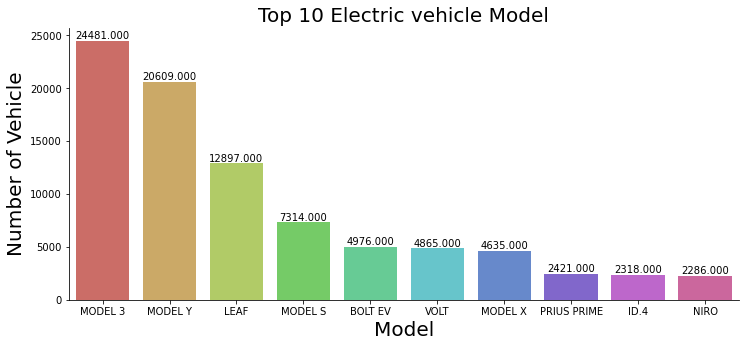

In [31]:
plt.figure(figsize=(12,5))
ax=sns.barplot(x=e_v_P['Model'].value_counts().index[:10], y=e_v_P["Model"].value_counts()[:10], data=e_v_P, palette='hls')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.xlabel('Model', fontsize=20)
plt.ylabel('Number of Vehicle', fontsize=20)
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()), 
                ha='center', va='bottom',color='black')
plt.title('Top 10 Electric vehicle Model', fontsize=20)
plt.show()

Model 3 of Tesla has almost 30% of EV vehicles followed by Tesla's Model Y. In total almost 50% of market is captured by Tesla in Washington, USA
Nissan's Leaf is the 3rd vehicle that has captures almost 16% of market.

## 3. What is the average electric range of battery electric vehicles (BEVs) in the dataset? 

In [34]:
average_electric_range = e_v_P[e_v_P['Electric_Vehicle_Type'] == 'BEV']['Electric_Range'].mean()

print(f"The average electric range of Battery Electric Vehicles (BEVs) is: {average_electric_range:.2f} miles")

The average electric range of Battery Electric Vehicles (BEVs) is: nan miles


## 4. How many plug-in hybrid electric vehicles (PHEVs) are eligible for clean alternative fuel vehicle (CAFV) incentives? 

In [35]:
phev_cafv_eligible = e_v_P[(e_v_P['Electric_Vehicle_Type'] == 'PHEV') & (e_v_P['Clean_Alternative_Fuel_Vehicle (CAFV) Eligibility'] == 'Yes')]

# Count the number of eligible PHEVs
num_eligible_phevs = len(phev_cafv_eligible)

print(f"Number of eligible PHEVs for CAFV incentives: {num_eligible_phevs}")

Number of eligible PHEVs for CAFV incentives: 0


## 5. Visualize the distribution of Electric Vehicle Models?

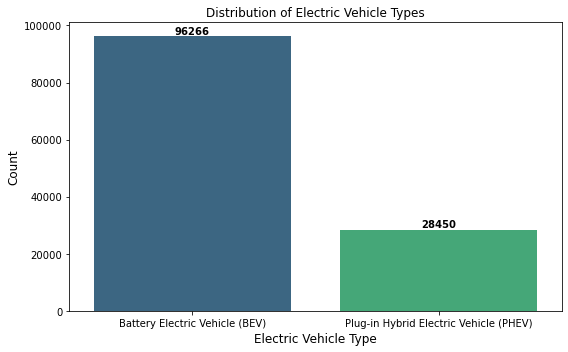

In [8]:
plt.figure(figsize=(8, 5))

sns.barplot(x = e_v_P['Electric_Vehicle_Type'].value_counts().index, y = e_v_P['Electric_Vehicle_Type'].value_counts(), palette = 'viridis')

plt.xlabel('Electric Vehicle Type', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Distribution of Electric Vehicle Types', fontsize = 12)

for index, value in enumerate(e_v_P['Electric_Vehicle_Type'].value_counts()):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', fontweight = 'bold', fontsize = 10, color = 'black')

plt.tight_layout()
plt.show()

## 6. Can you provide the details of the electric vehicle with the highest legislative district? 

In [40]:
data_sorted_by_legislative_district = e_v_P.sort_values(by='Legislative_District', ascending=False)

# Get the electric vehicle with the highest legislative district
highest_legislative_district_ev = data_sorted_by_legislative_district.iloc[0]

# Print the details of the electric vehicle with the highest legislative district
print("Electric Vehicle with the Highest Legislative District:")
print(highest_legislative_district_ev)








Electric Vehicle with the Highest Legislative District:
VIN (1-10)                                                                                  5YJYGDEEXM
County                                                                                           Clark
City                                                                                         Vancouver
State                                                                                               WA
Postal_Code                                                                                    98665.0
Model_Year                                                                                        2021
Make                                                                                             TESLA
Model                                                                                          MODEL Y
Electric_Vehicle_Type                                                   Battery Electric Vehicle (BEV)
Clean_Alternative

## 7. Plot the correlation map for all the numerical columns in the dataset? 

<AxesSubplot:>

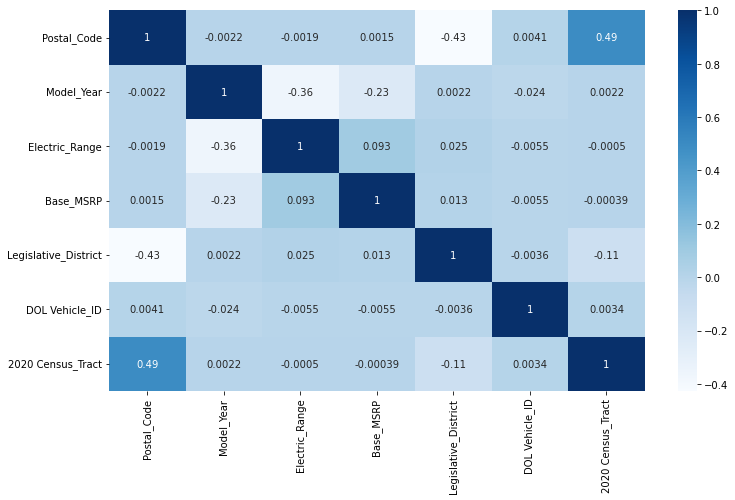

In [9]:
#HEAT MAP
plt.figure(figsize=(12,7))
sns.heatmap(e_v_P.corr(),annot = True,cmap="Blues")

## 8. How many electric vehicles have a base MSRP above $50,000? 

In [45]:
above_50k_count = e_v_P[e_v_P['Base_MSRP'] > 50000].shape[0]

# Print the count of electric vehicles with a base MSRP above $50,000
print(f"Number of electric vehicles with a base MSRP above $50,000: {above_50k_count}")

Number of electric vehicles with a base MSRP above $50,000: 2229


## 9. Which electric utility company serves the most electric vehicles in the dataset? 

In [47]:
utility_counts = e_v_P['Electric_Utility'].value_counts()

# Get the utility company with the highest count
most_serving_company = utility_counts.idxmax()
count_of_most_serving_company = utility_counts.max()

# Print the result
print(f"The electric utility company serving the most electric vehicles is {most_serving_company} with {count_of_most_serving_company} vehicles.")

The electric utility company serving the most electric vehicles is PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA) with 44995 vehicles.


## 10. Which year contains more manufacturing of electric vehicles? 

<AxesSubplot:xlabel='Model_Year', ylabel='Count'>

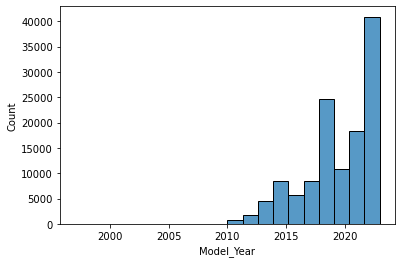

In [11]:
sns.histplot(data=e_v_P, x="Model_Year", bins=20)

## 11. For which electric range electrical vehicle has cleaner fuel (CAFV)? 

<AxesSubplot:xlabel='Electric_Range', ylabel='Count'>

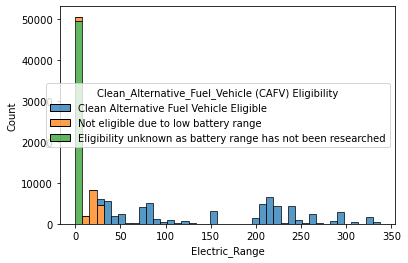

In [13]:
sns.histplot(data=e_v_P, x="Electric_Range", hue="Clean_Alternative_Fuel_Vehicle (CAFV) Eligibility", multiple="stack")

## 12. How many electric vehicles are eligible for CAFV incentives in Washington state? 

In [53]:
# Filter the data for Washington state and CAFV eligible vehicles
washington_cafv_vehicles = e_v_P[(data['State'] == 'WA') & (e_v_P['Clean_Alternative_Fuel_Vehicle (CAFV) Eligibility'] == 'CAFV')]

# Count the number of eligible vehicles
num_cafv_vehicles_wa = len(washington_cafv_vehicles)

print(f"The number of electric vehicles eligible for CAFV incentives in Washington state is {num_cafv_vehicles_wa}.")

The number of electric vehicles eligible for CAFV incentives in Washington state is 0.


C:\Users\91993\AppData\Local\Temp\ipykernel_19052\3846291704.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  washington_cafv_vehicles = e_v_P[(data['State'] == 'WA') & (e_v_P['Clean_Alternative_Fuel_Vehicle (CAFV) Eligibility'] == 'CAFV')]


## 13. Plot the distributions of CAFV Eligibility? 

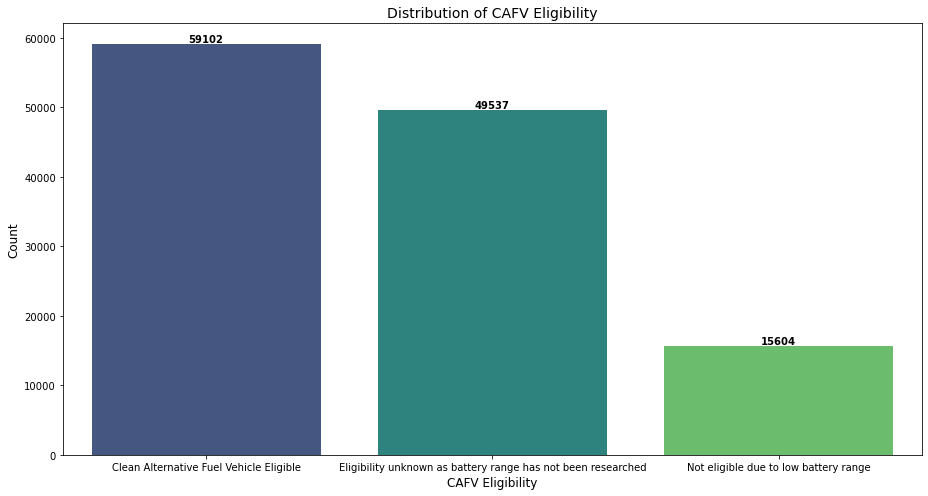

In [74]:
plt.figure(figsize=(13, 7))

sns.barplot(x = e_v_P['Clean_Alternative_Fuel_Vehicle (CAFV) Eligibility'].value_counts().index, y = e_v_P['Clean_Alternative_Fuel_Vehicle (CAFV) Eligibility'].value_counts(), palette = 'viridis')

plt.xlabel('CAFV Eligibility', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Distribution of CAFV Eligibility', fontsize = 14)

for index, value in enumerate(e_v_P['Clean_Alternative_Fuel_Vehicle (CAFV) Eligibility'].value_counts()):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', fontweight = 'bold', fontsize = 10, color = 'black')

plt.tight_layout()
plt.show()

This graph is self-explanatory due to research work almost 40K vehicles are still unknown

## 14. Can you provide details on electric vehicles with a legislative district of 1? 

In [60]:
# Filter the data for electric vehicles with legislative district 1
ev_legislative_district_1 = e_v_P[data['Legislative_District'] == 1]

# Print the details of electric vehicles with legislative district 1
print("Electric vehicles with legislative district 1:")
print(ev_legislative_district_1)

Electric vehicles with legislative district 1:
        VIN (1-10)     County      City State  Postal_Code  Model_Year  \
4       5UXKT0C5XH  Snohomish   Bothell    WA      98021.0        2017   
37      JN1AZ0CPXB  Snohomish  Lynnwood    WA      98036.0        2011   
44      5YJ3E1EB5L       King   Bothell    WA      98072.0        2020   
45      5YJ3E1EA2L  Snohomish   Bothell    WA      98012.0        2020   
46      5YJYGDEEXL  Snohomish   Bothell    WA      98021.0        2020   
...            ...        ...       ...   ...          ...         ...   
124624  WA1G2AFY3M  Snohomish   Bothell    WA      98021.0        2021   
124636  KNDRJDLH7N  Snohomish   Bothell    WA      98021.0        2022   
124685  7SAYGDEFXN  Snohomish   Bothell    WA      98012.0        2022   
124690  7SAYGDEE7P       King   Bothell    WA      98011.0        2023   
124695  YV4ED3UB8N       King   Bothell    WA      98011.0        2022   

          Make    Model                   Electric_Vehicle_Type 

C:\Users\91993\AppData\Local\Temp\ipykernel_19052\3331482455.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ev_legislative_district_1 = e_v_P[data['Legislative_District'] == 1]


## 15. How many electric vehicles have a 0 electric range? 

In [61]:
# Filter the data for electric vehicles with an electric range of 0
ev_range_zero = e_v_P[data['Electric_Range'] == 0]

# Get the count of electric vehicles with an electric range of 0
count_ev_range_zero = len(ev_range_zero)

# Print the count
print("Number of electric vehicles with a 0 electric range:", count_ev_range_zero)

Number of electric vehicles with a 0 electric range: 49537


C:\Users\91993\AppData\Local\Temp\ipykernel_19052\1425921894.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ev_range_zero = e_v_P[data['Electric_Range'] == 0]


## 16. Plot the distribution of Cars in Various Years in the dataset? 

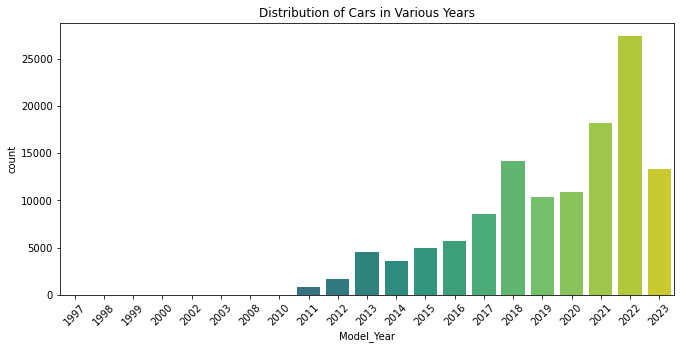

In [72]:
plt.figure(figsize = (11, 5))

sns.countplot(data = e_v_P, x = 'Model_Year', palette = 'viridis')

plt.title('Distribution of Cars in Various Years')
plt.xticks(rotation=45)
plt.show()

Most EV vehicles were manufactured in 2022 followed by 2021, year 2023 is low because almost half of the year is still left

## 17. Visualize the top 15 electrical vehicle makers.

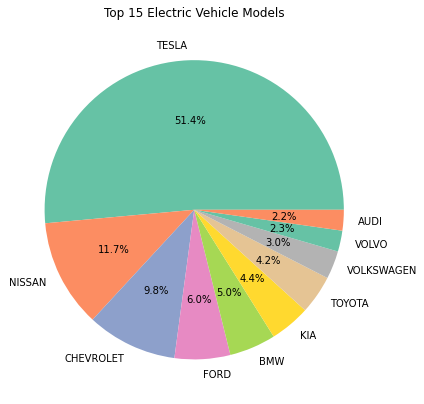

In [73]:
plt.figure(figsize=(6, 6))

plt.pie(e_v_P['Make'].value_counts()[:10], labels = e_v_P['Make'].value_counts()[:10].index, autopct = '%1.1f%%', colors = plt.cm.Set2.colors)

plt.title('Top 15 Electric Vehicle Models')
plt.tight_layout()
plt.show()

Tesla captures almost 52% of market whereas 9 companies together capture 50%

## 18. Visualize the number of electric vehicles (EVs) in each county?

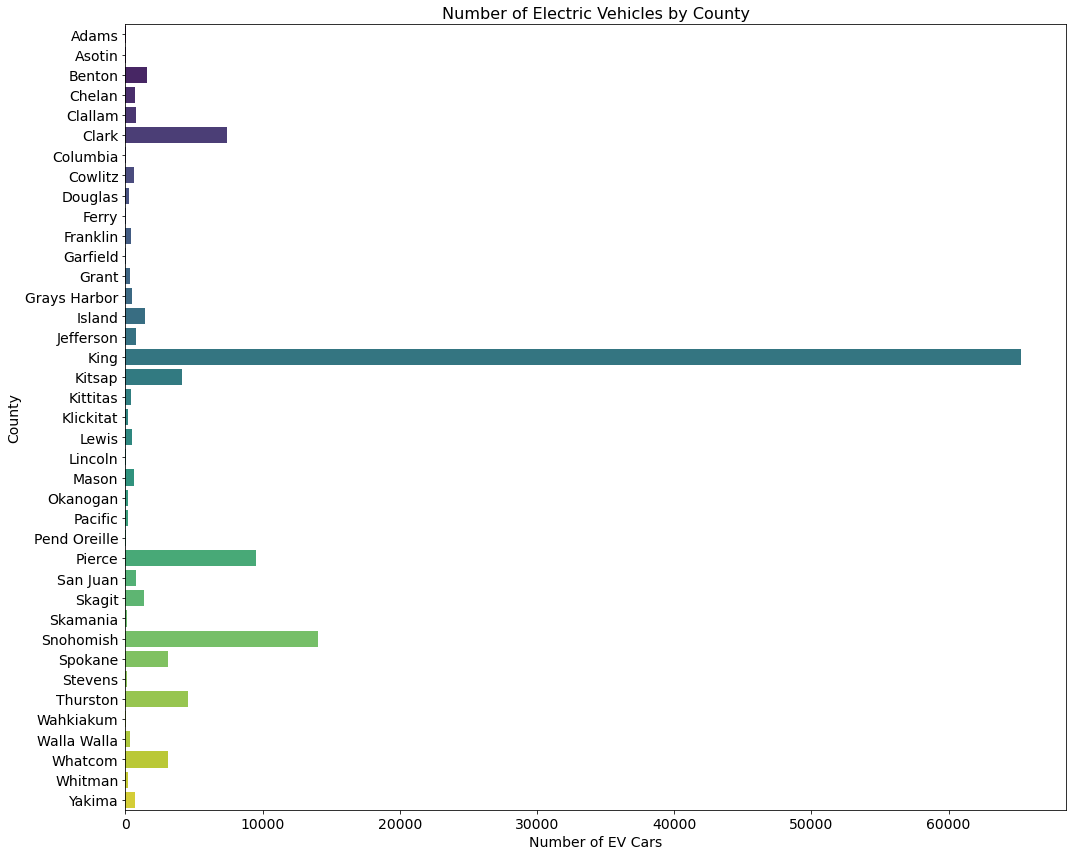

In [81]:
ev_count_by_county = e_v_P.groupby('County').size()
plt.figure(figsize=(15, 12))

sns.barplot(data = e_v_P, y = ev_count_by_county.index, x = ev_count_by_county.values, palette = 'viridis')

plt.xlabel('Number of EV Cars', fontsize = 14)
plt.ylabel('County', fontsize = 14)
plt.title('Number of Electric Vehicles by County', fontsize = 16)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.tight_layout()
plt.show()

King has the most no. of EV Cars followed by Snohomish then Pierce. The reason could be there might be more no. of charging stations in these areas

## 19. Visualize the distribution of electric vehicle types for the top N companies with the most electric vehicles ?

<Figure size 720x576 with 0 Axes>

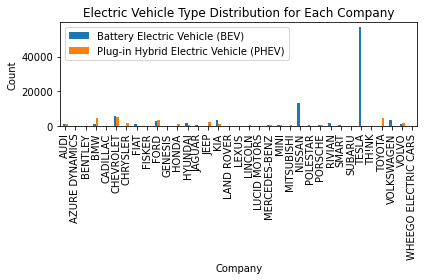

In [83]:
plt.figure(figsize = (10, 8))

grouped_barplot = e_v_P.groupby(['Make', 'Electric_Vehicle_Type']).size().unstack()
grouped_barplot.plot(kind = 'bar', stacked = False)

plt.title('Electric Vehicle Type Distribution for Each Company')
plt.xlabel('Company')
plt.ylabel('Count')

plt.legend()

plt.tight_layout()
plt.show()

We can see that Tesla is all about BEV vehicles it does not use PHEV vehicles at all
Nissan aswell follows the same as Tesla
Toyota uses only PHEV vehicles which is why Toyota is famous all over
Chevrolet uses almost 60-40 of both types

## 20. Which company has the more distribution of cars?

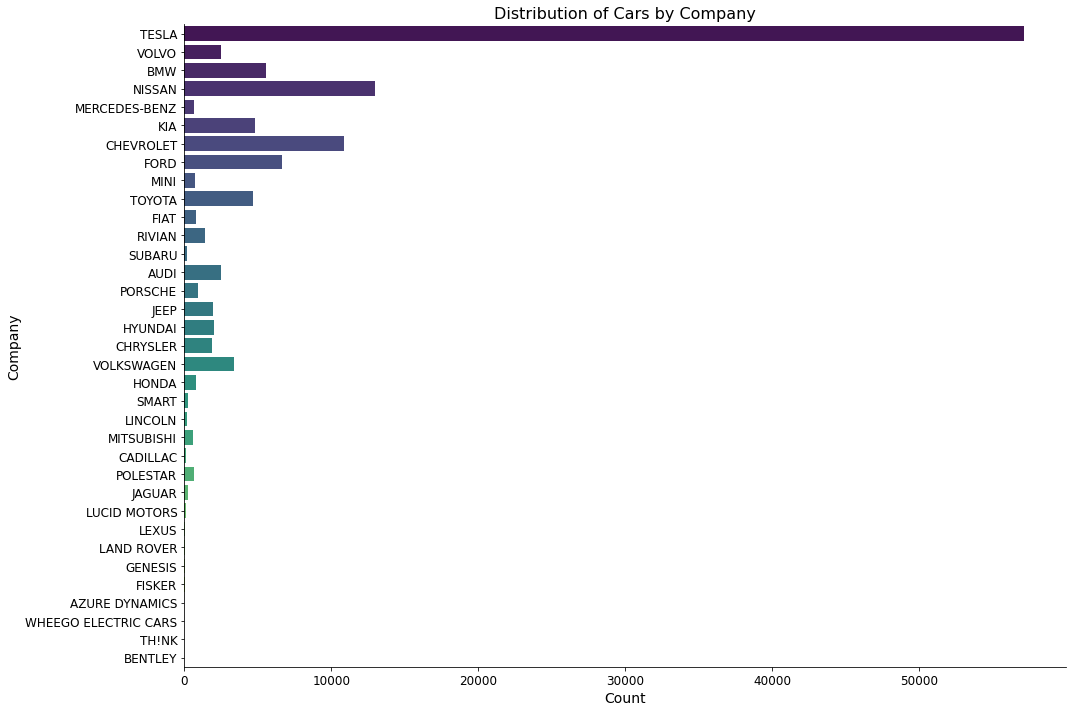

In [14]:
plt.figure(figsize = (15, 10))

sns.countplot(data = e_v_P, y = 'Make', palette = 'viridis')

plt.title('Distribution of Cars by Company', fontsize = 16)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Company', fontsize = 14)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

sns.despine()

plt.tight_layout()
plt.show()

Tesla has the most EV vehicles followed by Nissan, Chevrolet, Ford, BMW etc